# **Analysis and modelling of Red Wine Quality dataset using supervised methods**
## **-by AFZAL**

# About wine quality-red dataset

This dataset is related to red variant of the Portuguese "Vinho Verde" wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

### Content:

    Input variables (based on physicochemical tests): 
        1 - fixed acidity
        2 - volatile acidity
        3 - citric acid
        4 - residual sugar
        5 - chlorides
        6 - free sulfur dioxide
        7 - total sulfur dioxide
        8 - density
        9 - pH
        10 - sulphates
        11 - alcohol

    Output variable (based on sensory data):
        12 - quality (score between 0 and 10)

### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier

from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import classification_report, f1_score, confusion_matrix

from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline

import matplotlib.style as style
style.use("seaborn-darkgrid")

import warnings
warnings.filterwarnings('ignore')

### Loading dataset

In [3]:
# importing data
df=pd.read_csv('redwine quality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### ***Looks like a classification problem***

### Basic info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### *seems like no missing values*

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### *seems like all values are numerical*

### Renaming outcome to target

In [6]:
df.rename(columns={'quality':'target'}, inplace=True)

# **EDA**

### Getting idea about target

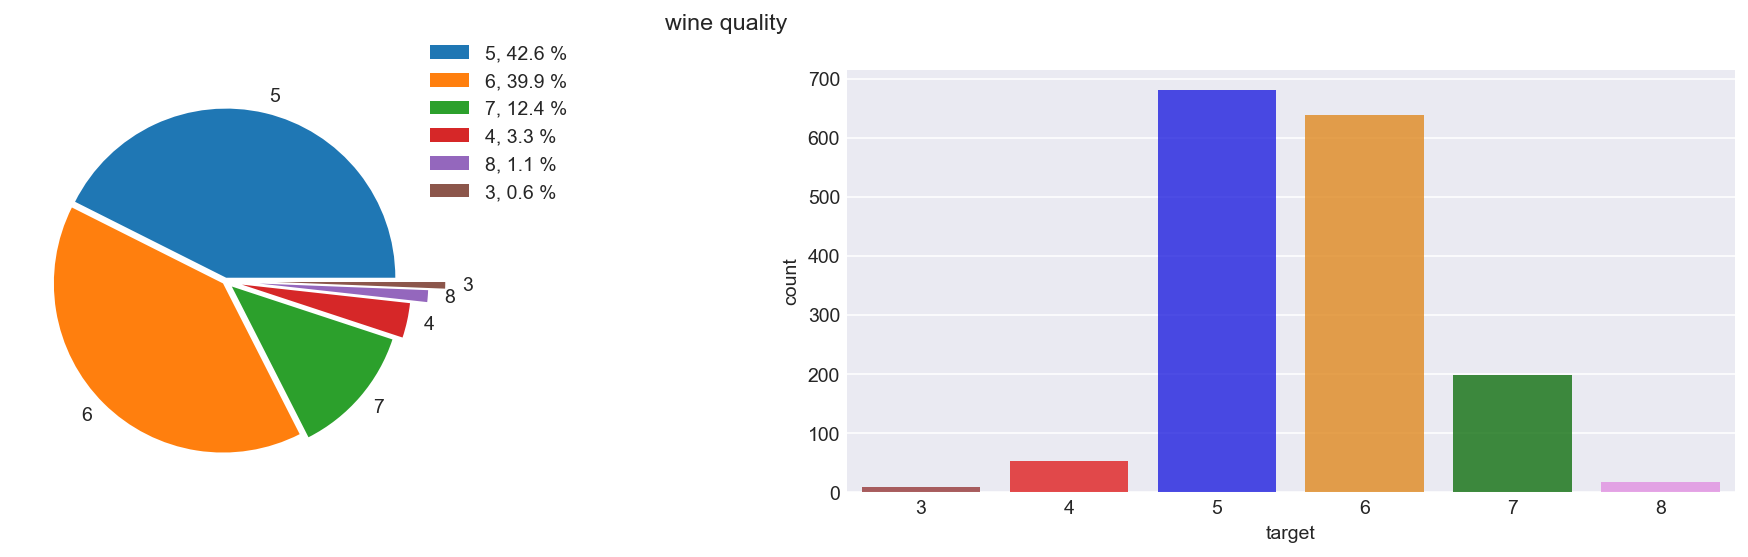

In [63]:
fig,ax=plt.subplots(1,2, figsize=(18,4), dpi=140)

df.target.value_counts().plot.pie(ax=ax[0], y='Quality', startangle=0, explode=(0.02,0.02,0.05,0.1,0.2,0.3), )
ax[0].set_ylabel('')
percents = df.target.value_counts().to_numpy() * 100 / df.target.value_counts().to_numpy().sum()
ax[0].legend(
    bbox_to_anchor= (1.35,1.1), loc='upper right',
    labels= ['%s, %1.1f %%' % (l, s) for l, s in zip(df.target.value_counts().index,percents)]
)

sns.countplot(x='target', data=df, alpha=0.8, ax=ax[1], palette={3:'brown',4:'red',5:'blue',6:'darkorange',7:'green',8:'violet'})

plt.suptitle('wine quality')
plt.show()

### ***looks like the moderately good wines are in abundance while worse or best wines are lesser,***
### ***hence there is an imbalance in classes***

In [65]:
##################################
'''IMPORTING FROM CUSTOM MODULE'''
##################################
from quick_EDA import analysis_quant, analysis_cate, handle_outliers, correlation 

## **UNIVARIATE ANALYSIS**

### analysing numerical features  

In [66]:
#Extracting numerical column names
cols_num=list(df.columns)
cols_num.remove('target')

				ANALYSIS OF: fixed acidity 

5 point summary for: fixed acidity
     fixed acidity
min            4.6
25%            7.1
50%            7.9
75%            9.2
max           15.9
---------------------------------
OUTLIERS in fixed acidity via Z score

Outlier limits:
lower limit: 3.097981872964991 
upper limit: 13.541292673626629

Total outliers: 12
     outliers   Z-score
243      15.0  3.838072
244      15.0  3.838072
347      13.8  3.148635
374      14.0  3.263541
381      13.7  3.091182
391      13.7  3.091182
442      15.6  4.182790
544      14.3  3.435900
554      15.5  4.125337
555      15.5  4.125337
557      15.6  4.182790
652      15.9  4.355149
---------------------------------
OUTLIERS in fixed acidity via IQR

Outlier limits:
lower limit: 3.95 
upper limit: 12.349999999999998

Total outliers: 49
205     12.8
206     12.8
243     15.0
244     15.0
264     12.5
294     13.3
328     13.4
338     12.4
339     12.5
347     13.8
353     13.5
359     12.6
363     12.5
364     

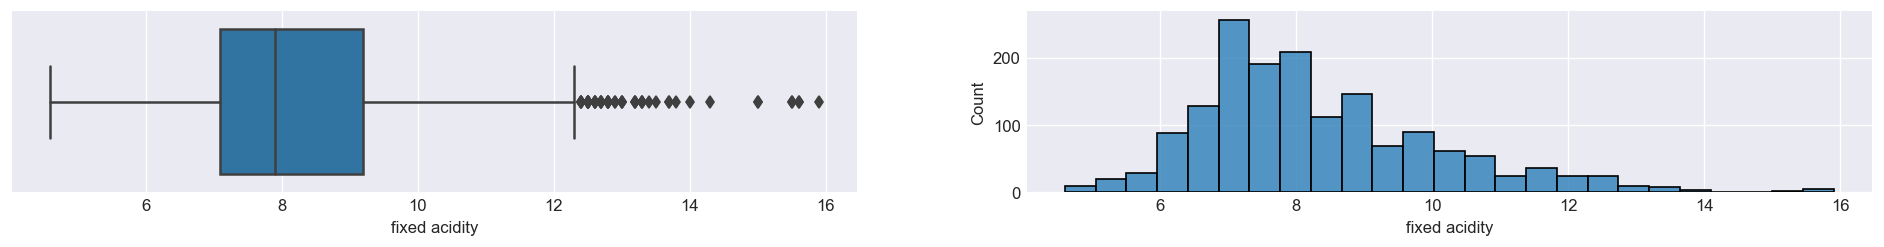

___________________________________________________________________________________________________________
				ANALYSIS OF: volatile acidity 

5 point summary for: volatile acidity
     volatile acidity
min              0.12
25%              0.39
50%              0.52
75%              0.64
max              1.58
---------------------------------
OUTLIERS in volatile acidity via Z score

Outlier limits:
lower limit: -0.00919059991355764 
upper limit: 1.064831625554583

Total outliers: 10
      outliers   Z-score
38       1.130  3.364062
120      1.070  3.028873
126      1.330  4.481357
127      1.330  4.481357
199      1.090  3.140603
672      1.240  3.978574
690      1.185  3.671318
724      1.115  3.280264
1299     1.580  5.877976
1312     1.180  3.643385
---------------------------------
OUTLIERS in volatile acidity via IQR

Outlier limits:
lower limit: 0.015000000000000013 
upper limit: 1.0150000000000001

Total outliers: 19
38      1.130
94      1.020
120     1.070
126     1.330
12

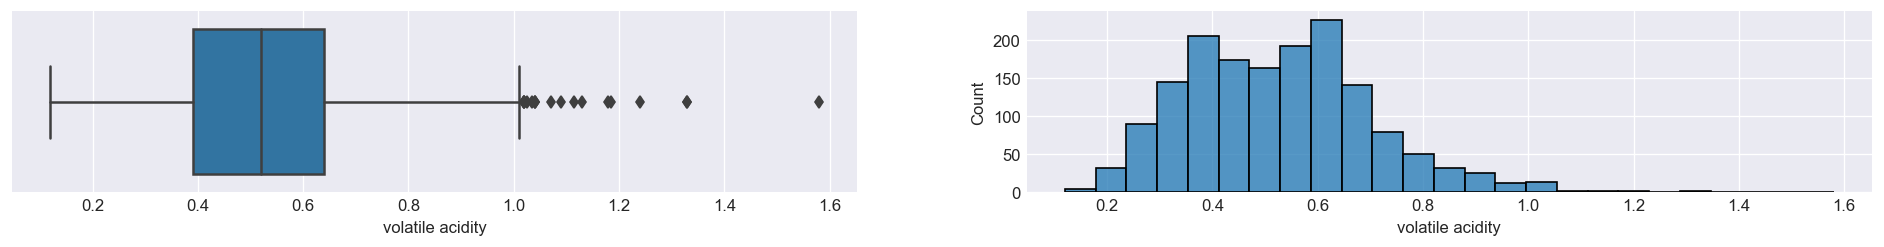

___________________________________________________________________________________________________________
				ANALYSIS OF: citric acid 

5 point summary for: citric acid
     citric acid
min         0.00
25%         0.09
50%         0.26
75%         0.42
max         1.00
---------------------------------
OUTLIERS in citric acid via Z score

Outlier limits:
lower limit: -0.3132450336009034 
upper limit: 0.8551962531130985

Total outliers: 1
     outliers   Z-score
151       1.0  3.743574
---------------------------------
OUTLIERS in citric acid via IQR

Outlier limits:
lower limit: -0.4049999999999999 
upper limit: 0.9149999999999999

Total outliers: 1
151    1.0
Name: citric acid, dtype: float64
---------------------------------


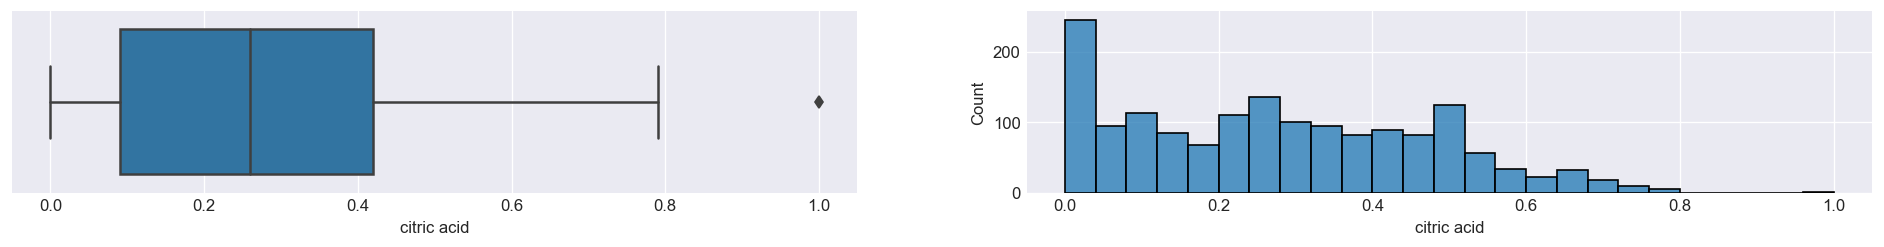

___________________________________________________________________________________________________________
				ANALYSIS OF: residual sugar 

5 point summary for: residual sugar
     residual sugar
min             0.9
25%             1.9
50%             2.2
75%             2.6
max            15.5
---------------------------------
OUTLIERS in residual sugar via Z score

Outlier limits:
lower limit: -1.6896558340244985 
upper limit: 6.767266840903798

Total outliers: 30
      outliers   Z-score
33        10.7  5.790187
163        7.3  3.377962
164        7.2  3.307015
274        7.0  3.165119
324       11.0  6.003031
325       11.0  6.003031
396        7.9  3.803649
400        7.9  3.803649
480       15.5  9.195681
494        8.3  4.087440
595        7.9  3.803649
649        8.6  4.300284
652        7.5  3.519858
911        9.0  4.584075
917        8.8  4.442179
923        8.8  4.442179
1043       8.9  4.513127
1071       8.1  3.945545
1074       8.1  3.945545
1079       8.3  4.087440
10

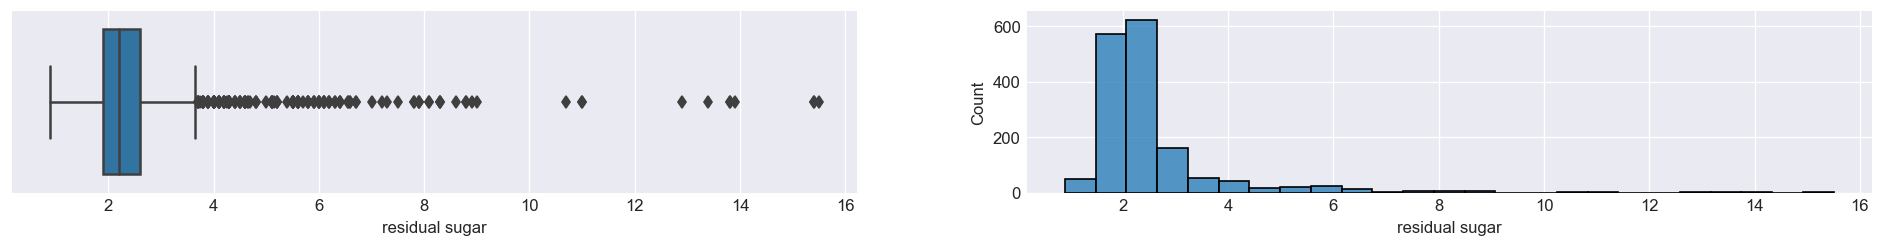

___________________________________________________________________________________________________________
				ANALYSIS OF: chlorides 

5 point summary for: chlorides
     chlorides
min      0.012
25%      0.070
50%      0.079
75%      0.090
max      0.611
---------------------------------
OUTLIERS in chlorides via Z score

Outlier limits:
lower limit: -0.05368520622145434 
upper limit: 0.22861828939843992

Total outliers: 31
      outliers    Z-score
17       0.368   5.962380
19       0.341   5.388530
42       0.332   5.197246
81       0.464   8.002737
83       0.401   6.663753
106      0.467   8.066499
147      0.236   3.156889
151      0.610  11.105781
169      0.360   5.792350
181      0.270   3.879515
226      0.337   5.303515
240      0.263   3.730739
258      0.611  11.127035
281      0.358   5.749843
291      0.343   5.431037
451      0.413   6.918798
568      0.250   3.454441
692      0.422   7.110081
730      0.387   6.366201
754      0.415   6.961305
776      0.243   3.3056

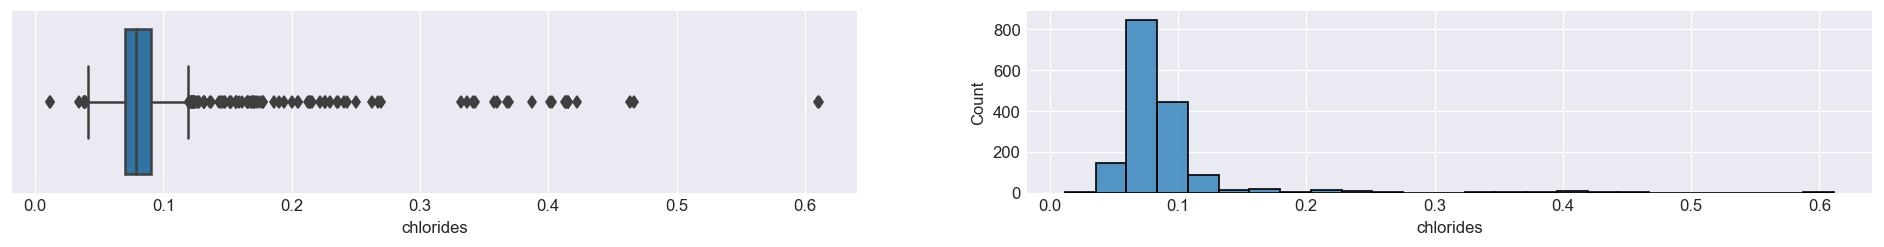

___________________________________________________________________________________________________________
				ANALYSIS OF: free sulfur dioxide 

5 point summary for: free sulfur dioxide
     free sulfur dioxide
min                  1.0
25%                  7.0
50%                 14.0
75%                 21.0
max                 72.0
---------------------------------
OUTLIERS in free sulfur dioxide via Z score

Outlier limits:
lower limit: -15.49573501865082 
upper limit: 47.2455786709335

Total outliers: 22
      outliers   Z-score
14        52.0  3.454669
15        51.0  3.359038
57        50.0  3.263407
396       68.0  4.984761
400       68.0  4.984761
584       54.0  3.645930
925       53.0  3.550300
926       52.0  3.454669
982       51.0  3.359038
1131      57.0  3.932823
1154      50.0  3.263407
1175      48.0  3.072146
1231      48.0  3.072146
1244      72.0  5.367284
1295      51.0  3.359038
1296      51.0  3.359038
1358      52.0  3.454669
1434      55.0  3.741561
1435     

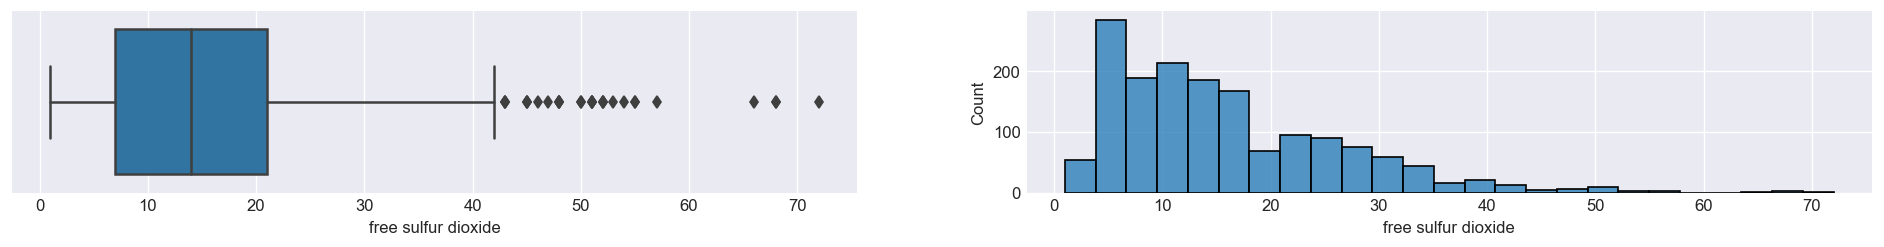

___________________________________________________________________________________________________________
				ANALYSIS OF: total sulfur dioxide 

5 point summary for: total sulfur dioxide
     total sulfur dioxide
min                   6.0
25%                  22.0
50%                  38.0
75%                  62.0
max                 289.0
---------------------------------
OUTLIERS in total sulfur dioxide via Z score

Outlier limits:
lower limit: -52.18731758511984 
upper limit: 145.12290232558263

Total outliers: 15
      outliers   Z-score
15       148.0  3.087490
109      153.0  3.239534
354      165.0  3.604442
515      151.0  3.178716
591      149.0  3.117899
636      147.0  3.057081
649      148.0  3.087490
651      155.0  3.300352
672      151.0  3.178716
684      152.0  3.209125
1079     278.0  7.040655
1081     289.0  7.375154
1244     160.0  3.452397
1493     147.0  3.057081
1496     147.0  3.057081
---------------------------------
OUTLIERS in total sulfur dioxide via IQ

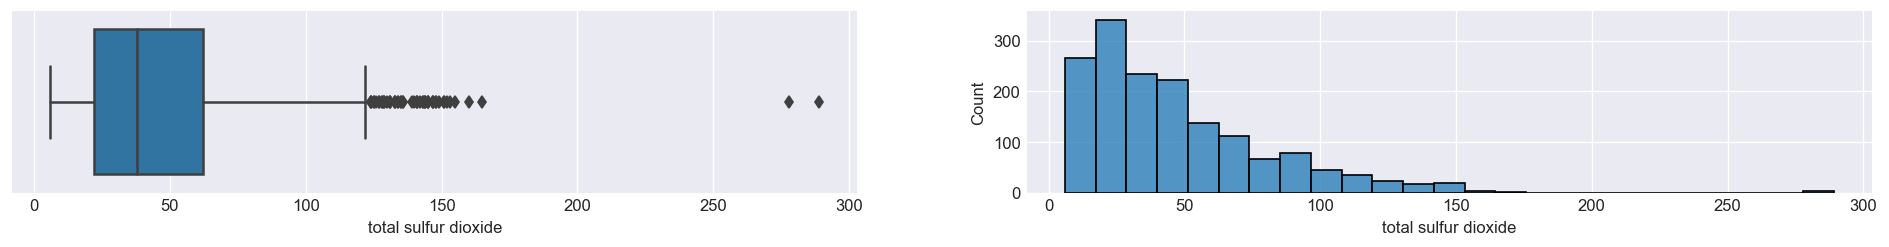

___________________________________________________________________________________________________________
				ANALYSIS OF: density 

5 point summary for: density
      density
min  0.990070
25%  0.995600
50%  0.996750
75%  0.997835
max  1.003690
---------------------------------
OUTLIERS in density via Z score

Outlier limits:
lower limit: 0.991086448071987 
upper limit: 1.0024069102769813

Total outliers: 18
      outliers   Z-score
442    1.00320  3.420348
480    1.00260  3.102340
554    1.00315  3.393848
555    1.00315  3.393848
557    1.00315  3.393848
608    1.00260  3.102340
836    0.99064 -3.236624
837    0.99064 -3.236624
889    1.00289  3.256044
1017   0.99007 -3.538731
1018   0.99007 -3.538731
1114   0.99020 -3.469830
1269   0.99080 -3.151821
1270   0.99084 -3.130621
1434   1.00369  3.680055
1435   1.00369  3.680055
1474   1.00242  3.006938
1476   1.00242  3.006938
---------------------------------
OUTLIERS in density via IQR

Outlier limits:
lower limit: 0.9922475000000001

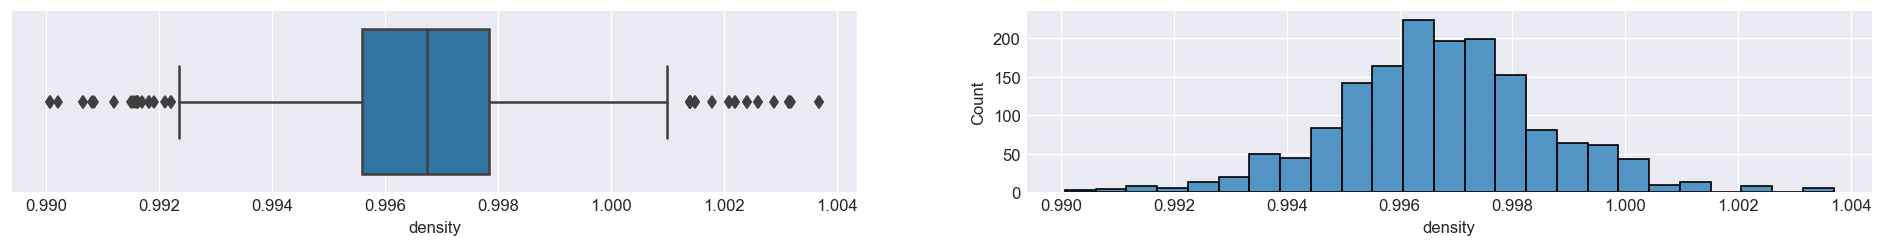

___________________________________________________________________________________________________________
				ANALYSIS OF: pH 

5 point summary for: pH
       pH
min  2.74
25%  3.21
50%  3.31
75%  3.40
max  4.01
---------------------------------
OUTLIERS in pH via Z score

Outlier limits:
lower limit: 2.848098651515537 
upper limit: 3.7741277399791464

Total outliers: 8
      outliers   Z-score
45        3.90  3.815561
95        3.85  3.491597
151       2.74 -3.700401
695       3.90  3.815561
1111      3.78  3.038048
1300      3.78  3.038048
1316      4.01  4.528282
1321      4.01  4.528282
---------------------------------
OUTLIERS in pH via IQR

Outlier limits:
lower limit: 2.925 
upper limit: 3.6849999999999996

Total outliers: 35
45      3.90
94      3.75
95      3.85
151     2.74
268     3.69
276     3.69
440     2.88
544     2.86
553     3.74
554     2.92
555     2.92
557     2.92
588     3.72
614     2.87
650     2.89
656     2.89
657     2.92
695     3.90
821     3.71
930    

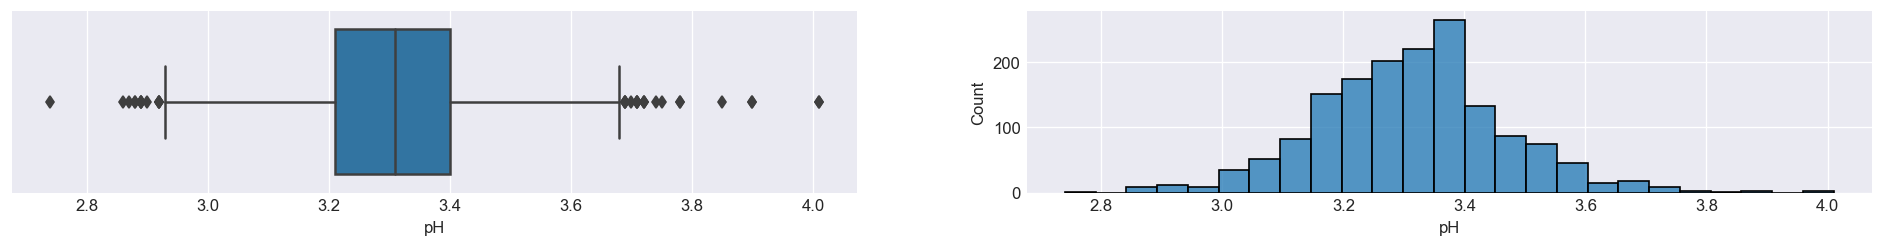

___________________________________________________________________________________________________________
				ANALYSIS OF: sulphates 

5 point summary for: sulphates
     sulphates
min       0.33
25%       0.55
50%       0.62
75%       0.73
max       2.00
---------------------------------
OUTLIERS in sulphates via Z score

Outlier limits:
lower limit: 0.14978694130150527 
upper limit: 1.1665107447522782

Total outliers: 27
      outliers   Z-score
13        1.56  5.322101
17        1.28  3.669735
43        1.20  3.197630
81        1.28  3.669735
86        1.95  7.623611
88        1.22  3.315657
91        1.95  7.623611
92        1.98  7.800650
106       1.31  3.846774
151       2.00  7.918677
169       1.59  5.499140
226       1.61  5.617167
258       1.26  3.551709
339       1.36  4.141840
340       1.18  3.079604
614       1.36  4.141840
639       1.36  4.141840
692       1.17  3.020591
723       1.62  5.676180
795       1.18  3.079604
1051      1.34  4.023813
1288      1.17  3.020

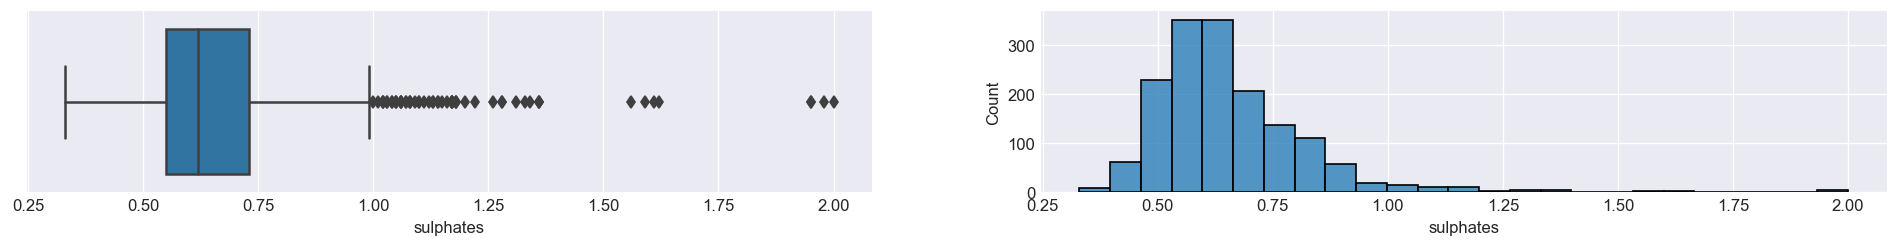

___________________________________________________________________________________________________________
				ANALYSIS OF: alcohol 

5 point summary for: alcohol
     alcohol
min      8.4
25%      9.5
50%     10.2
75%     11.1
max     14.9
---------------------------------
OUTLIERS in alcohol via Z score

Outlier limits:
lower limit: 7.226980213415284 
upper limit: 13.618986015477773

Total outliers: 8
      outliers   Z-score
142       14.0  3.357647
144       14.0  3.357647
467       14.0  3.357647
588       14.0  3.357647
652       14.9  4.202453
821       14.0  3.357647
1269      14.0  3.357647
1270      14.0  3.357647
---------------------------------
OUTLIERS in alcohol via IQR

Outlier limits:
lower limit: 7.1000000000000005 
upper limit: 13.5

Total outliers: 13
142     14.000000
144     14.000000
467     14.000000
588     14.000000
652     14.900000
821     14.000000
1114    13.600000
1132    13.600000
1228    13.600000
1269    14.000000
1270    14.000000
1475    13.566667
1

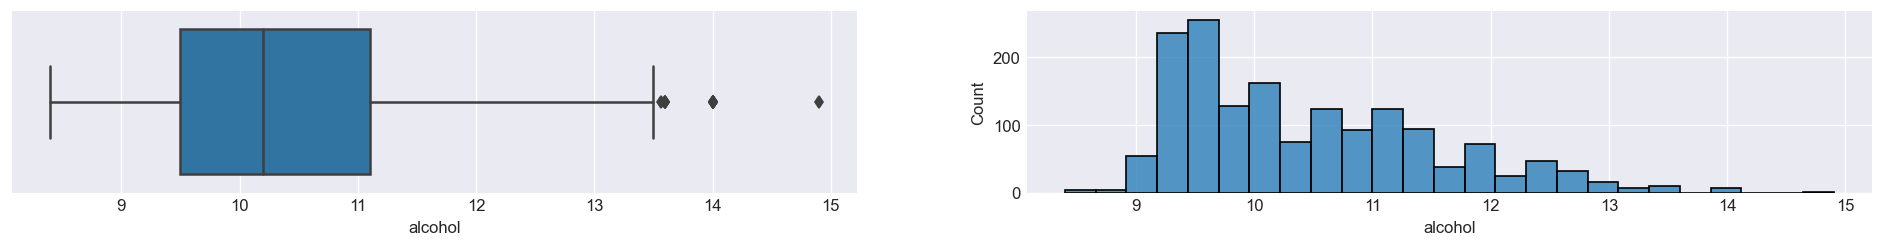

___________________________________________________________________________________________________________


In [67]:
analysis_quant(df, cols_num, figsize=(20,2), dpi=120)

### ***there seem to be a lot of outliers in most of the features***
    since this is an imbalanced class problem, we cannot handle outliers like balanced classes
    The best way to proceed is to increase the representation of the minority classes

## **BIVARIATE ANALYSIS**

### Correlation between features

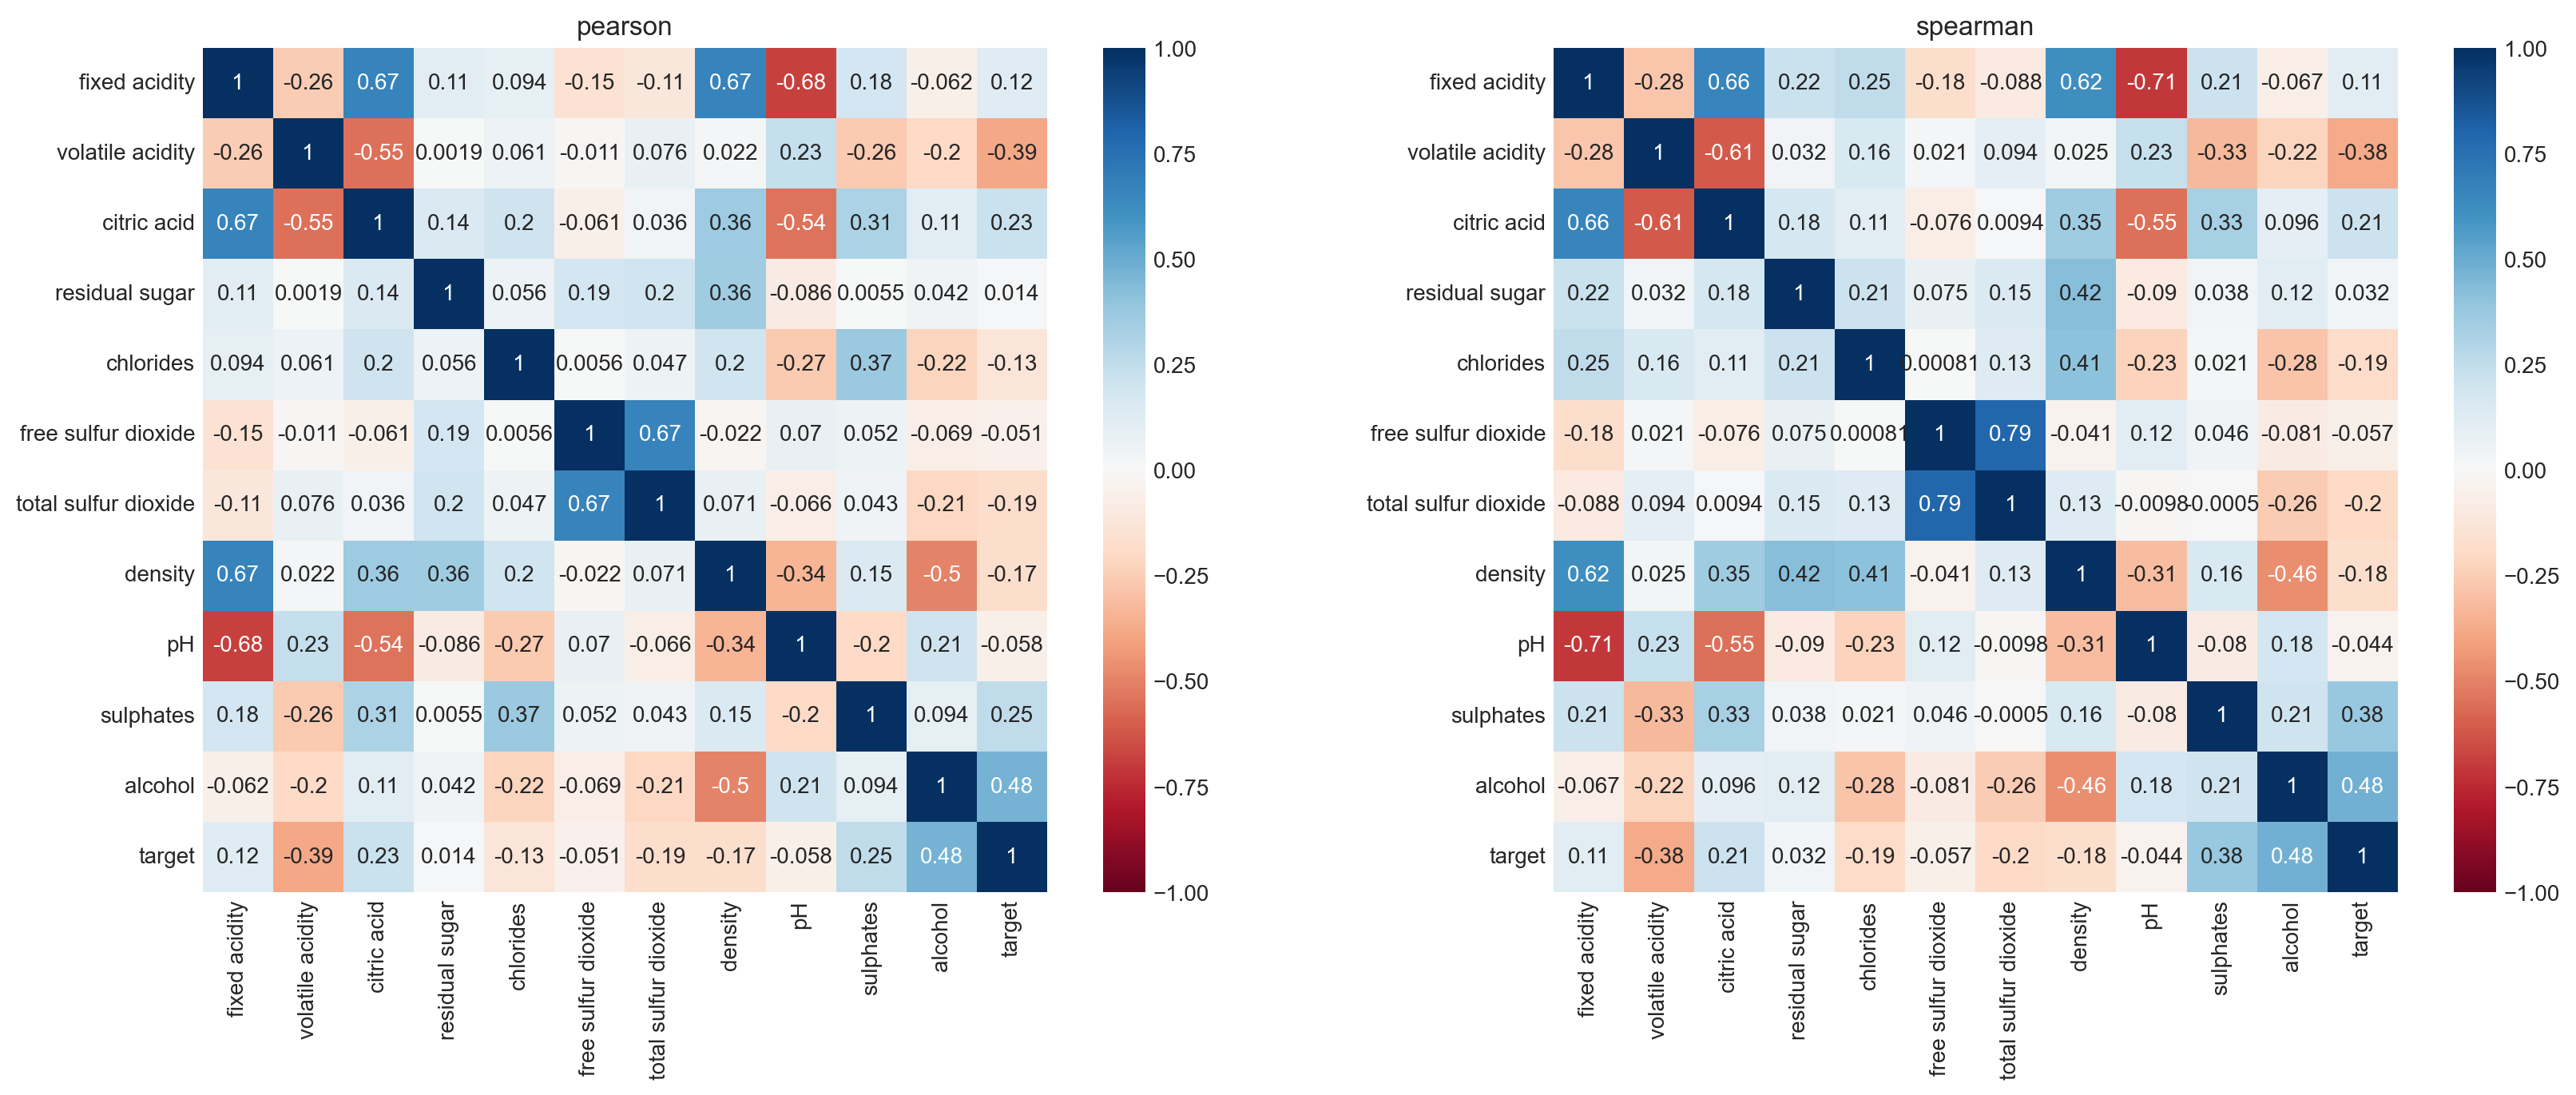

In [83]:
correlation(df, figsize=(20,7), dpi=200)

+    *Fixed acidity and pH seem to have good negative correlation( because as pH decreases, acidity increases)*
+    *Fixed acidity and density seem to have good positive correlation*
+    *Fixed acidity and citric acid seem to have good positive correlation( seems like most of the acidity is provided by citric acid)*
+    *Free sulphur dioxide and total sulphur dioxide seem to have good positive correlation*

### analysing continuous features  
    lets see how each feature influences the quality of wine

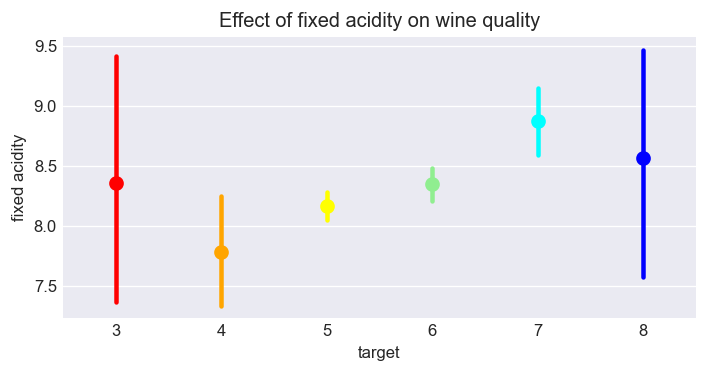

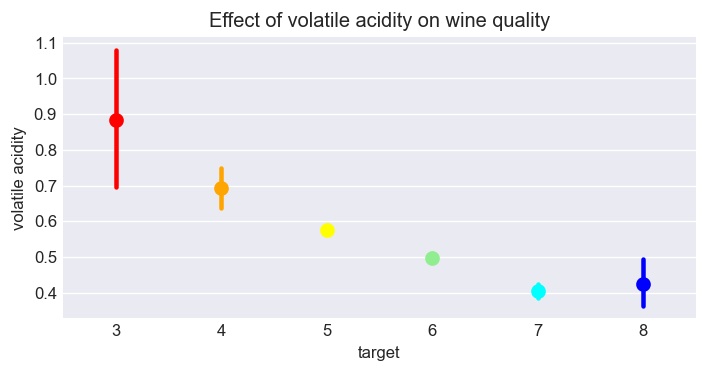

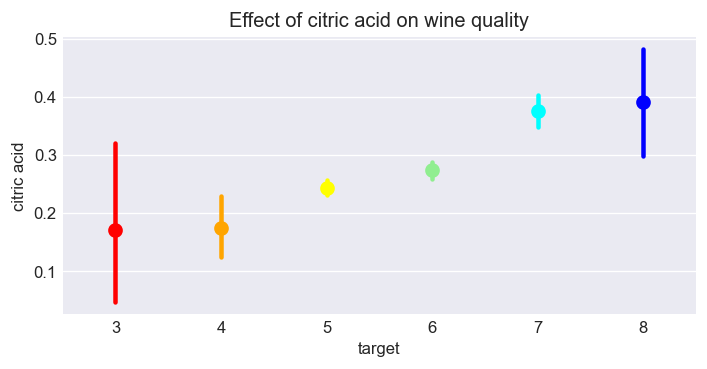

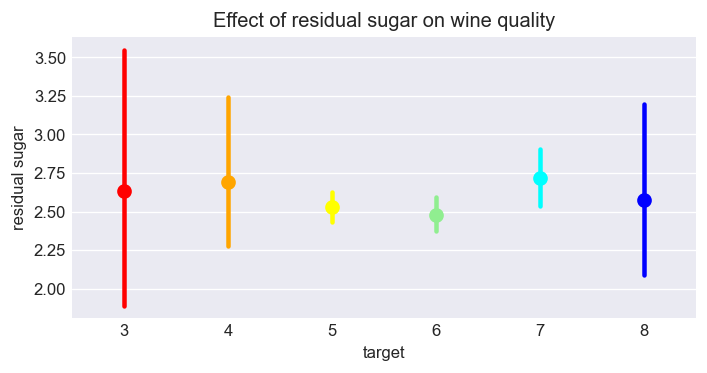

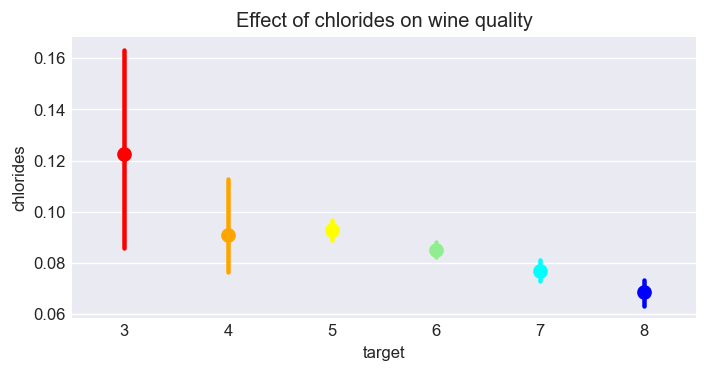

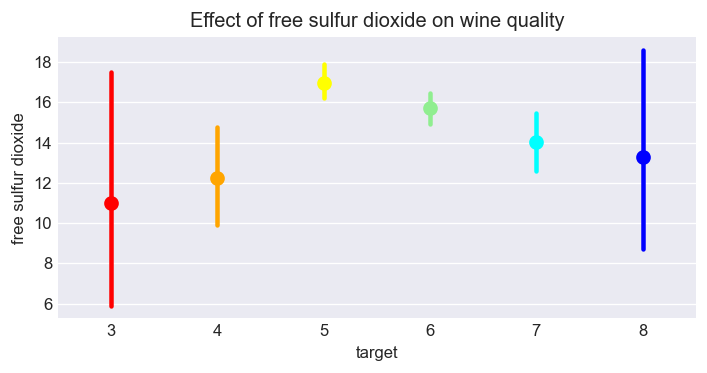

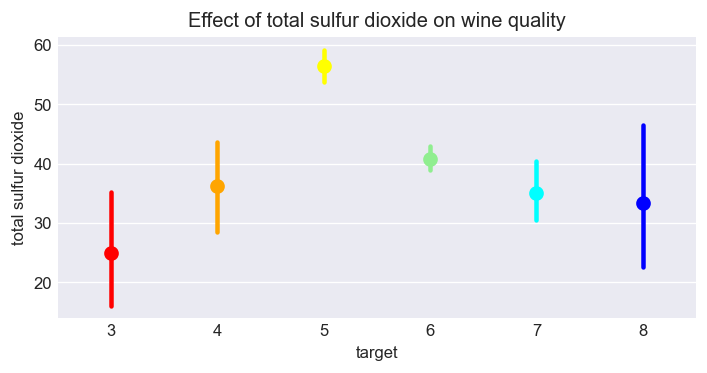

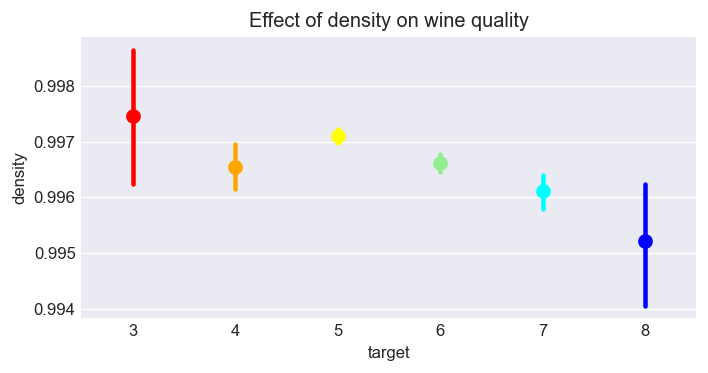

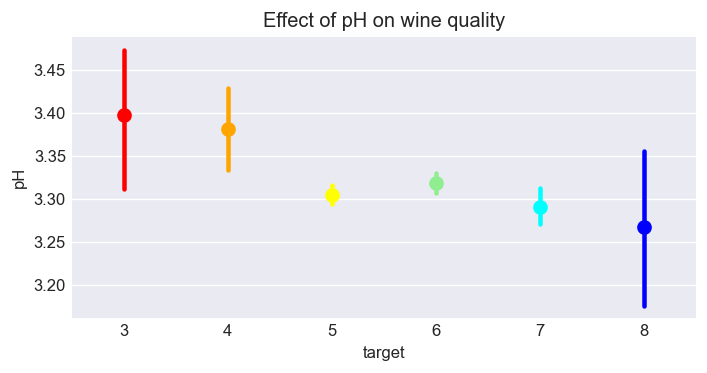

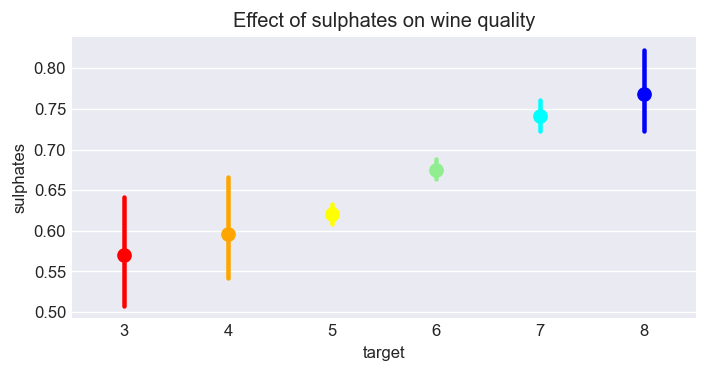

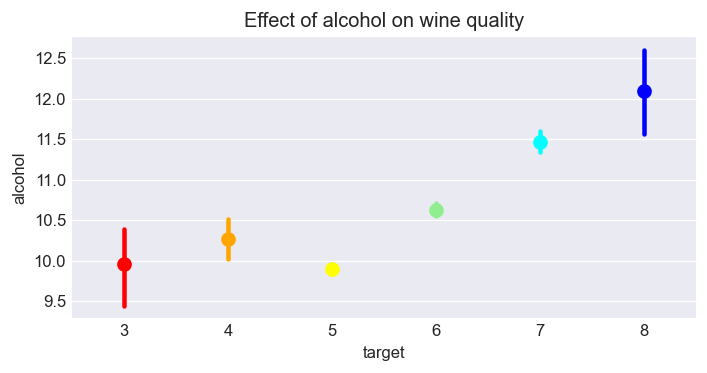

In [122]:
for col in df.drop(columns=['target'], axis=1).columns:
    
    plot=sns.catplot(
        data=df,
        x='target',
        y=col,
        hue='target',
        kind='point',
        aspect=2, fill=True, height=3, palette={3:'red',4:'orange',5:'yellow',6:'lightgreen',7:'cyan',8:'blue'}
    )
    plt.title(f'Effect of {col} on wine quality')
    plot.fig.dpi=120

## Features that lead to better wine quality:
+    ***Less volatile acidity***
+    ***Higher citric acid***
+    ***Lesser chlorides***
+    ***Lesser density may result in better quality***
+    ***Lesser pH may result in better quality***
+    ***Higher sulphates***
+    ***Higher alcohol of course ;)***

## **Multivariate analysis**

    Since volatile acidity and alcohol has highest correlation with target, lets see their combined effect on quality 

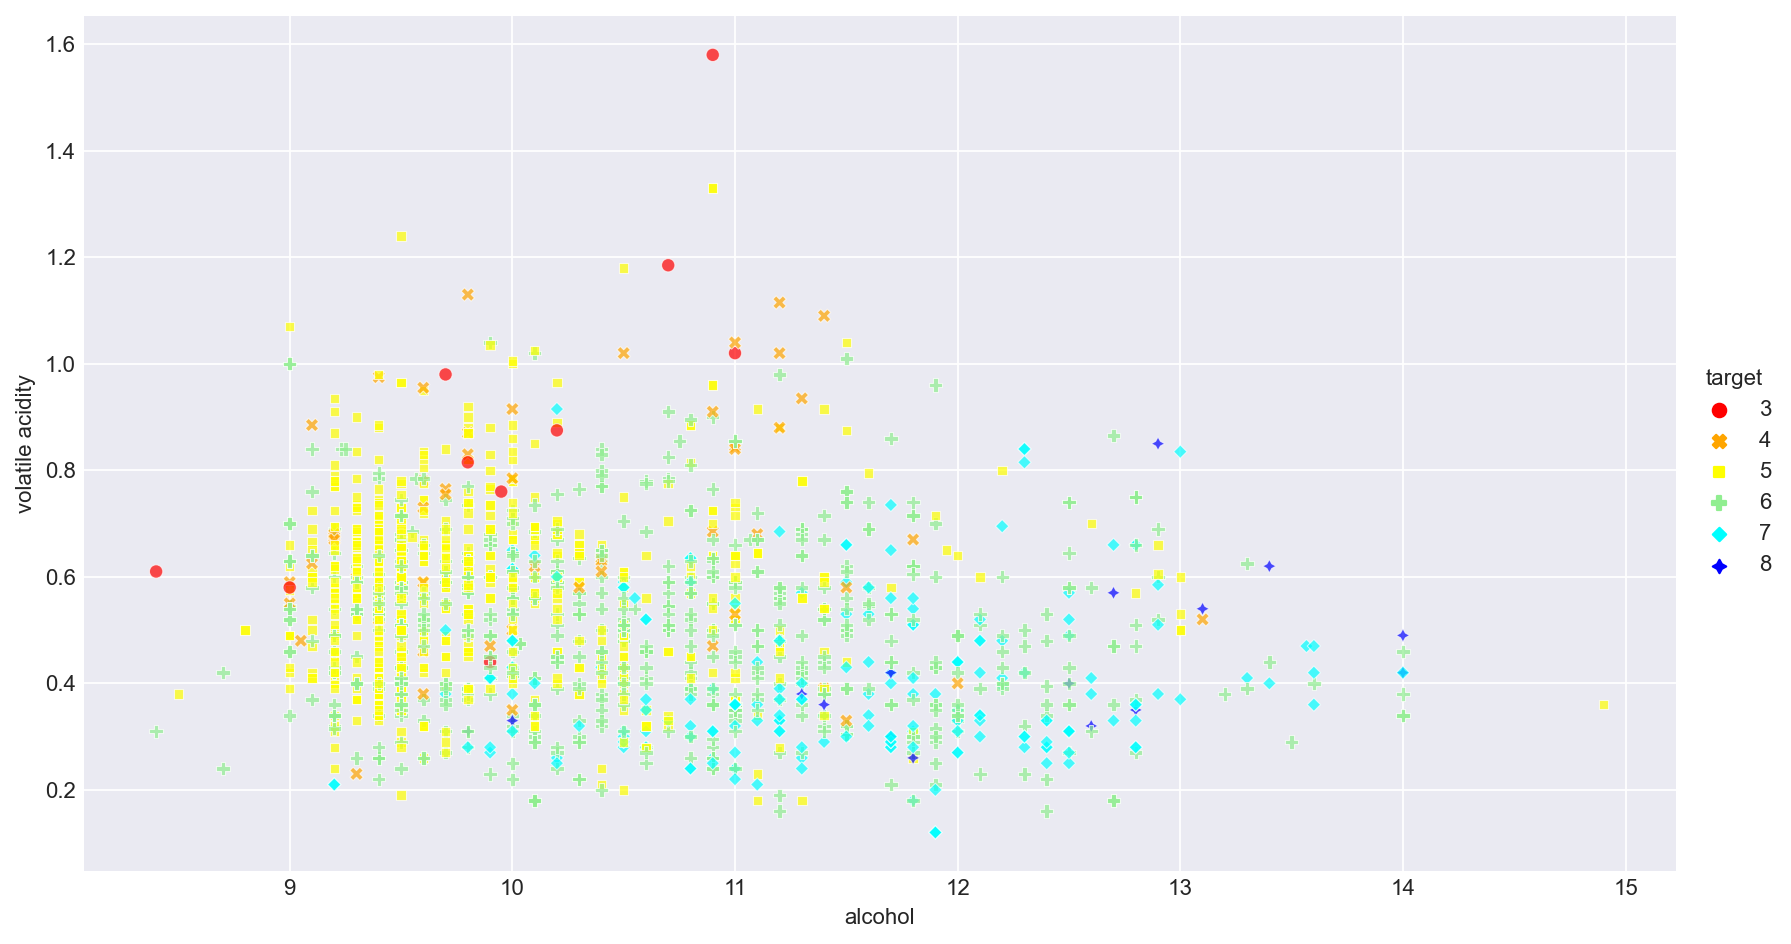

In [141]:
plot=sns.relplot(
    data=df,
    x='alcohol',
    y='volatile acidity',
    hue='target',
    style='target',
    aspect=16/9, height=6, alpha=0.7, palette={3:'red',4:'orange',5:'yellow',6:'lightgreen',7:'cyan',8:'blue'}
)

plot.fig.dpi=160

### ***Seems like the general trend is that higher alcohol and lower volatile acidity improve wine quality***

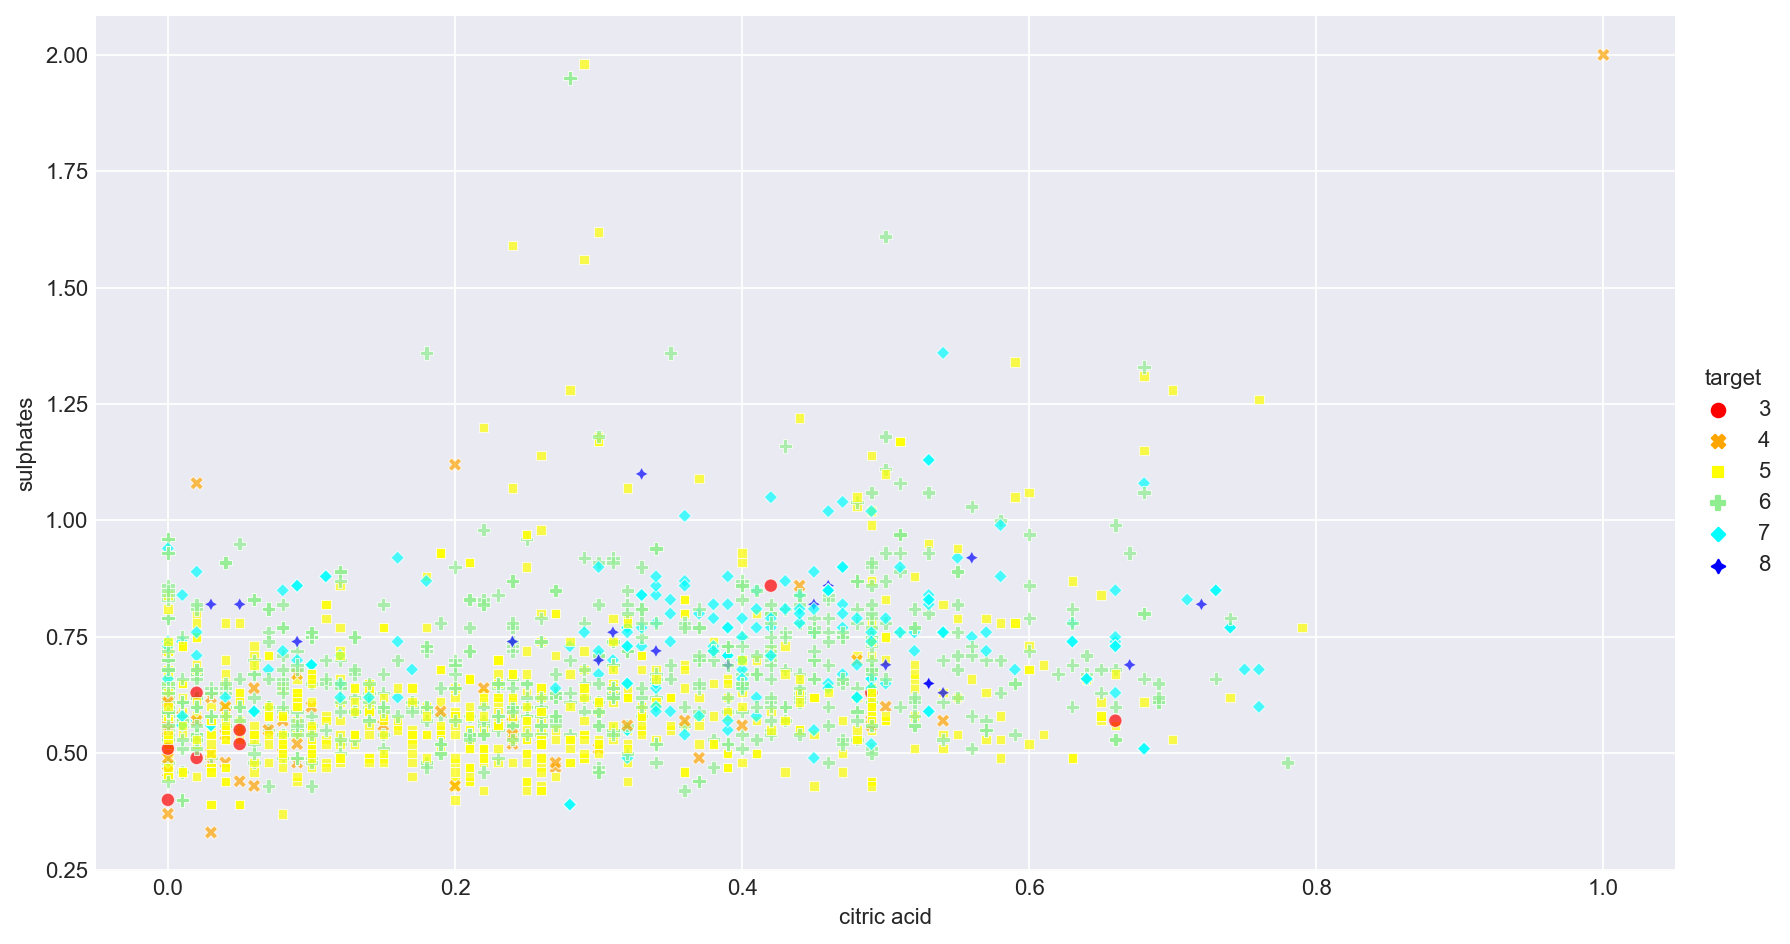

In [142]:
plot=sns.relplot(
    data=df,
    x='citric acid',
    y='sulphates',
    hue='target',
    style='target',
    aspect=16/9, height=6, alpha=0.7, palette={3:'red',4:'orange',5:'yellow',6:'lightgreen',7:'cyan',8:'blue'}
)

plot.fig.dpi=160

# **MODELS AND PIPELINES**

##### separating features and label

In [18]:
X=df.drop('target', axis=1)
y=df.target

##### train test split

In [19]:
# although CV score is being used, this split is needed for making confusion matrix
xtrain,xtest,ytrain,ytest=train_test_split(X,y)

### defining models

In [20]:
model_lr=LogisticRegression(n_jobs=-1, C=0.07)

model_dt=DecisionTreeClassifier(max_depth=6, min_samples_split=50 )   

model_rf=RandomForestClassifier(n_jobs=-1, max_features=0.5, max_depth=6, min_samples_split=50)    

model_ada_dt=AdaBoostClassifier( base_estimator=DecisionTreeClassifier(max_depth=6, min_samples_split=50), n_estimators=100, learning_rate=5)   

model_ada_rf=AdaBoostClassifier(base_estimator=RandomForestClassifier(n_jobs=-1, max_features=0.5, max_depth=6, min_samples_split=50), n_estimators=50, learning_rate=0.1)  

model_gb=GradientBoostingClassifier(max_depth=6, min_samples_split=50)

model_svc=SVC(C=0.1, degree=5, probability=True )   

model_gnb=GaussianNB()

model_knc=KNeighborsClassifier(n_neighbors=5, n_jobs=-1, weights='distance')   

model_rnc=RadiusNeighborsClassifier(radius=5, n_jobs=-1, weights='distance')  

model_xgb=XGBClassifier(n_estimators=500, learning_rate=0.1, n_jobs=-1)

# dictionary of all models
models={'logistic':model_lr, 'decision tree':model_dt, 'random forest':model_rf, 'adaboost using dt':model_ada_dt, 'adaboost using rf':model_ada_rf,
        'gradboost':model_gb, 'SVC':model_svc, 'Gaussian NB':model_gnb, 'KNC':model_knc, 'RNC':model_rnc, 'xgboost':model_xgb }

### pipeline and scores

LOGISTIC model:

train accuracy: 0.71
test accuracy: 0.74
cross validation f1 score: 0.37

classification report:
               precision    recall  f1-score   support

           0       0.73      0.99      0.84       131
           1       0.93      0.21      0.35        61

    accuracy                           0.74       192
   macro avg       0.83      0.60      0.59       192
weighted avg       0.79      0.74      0.68       192



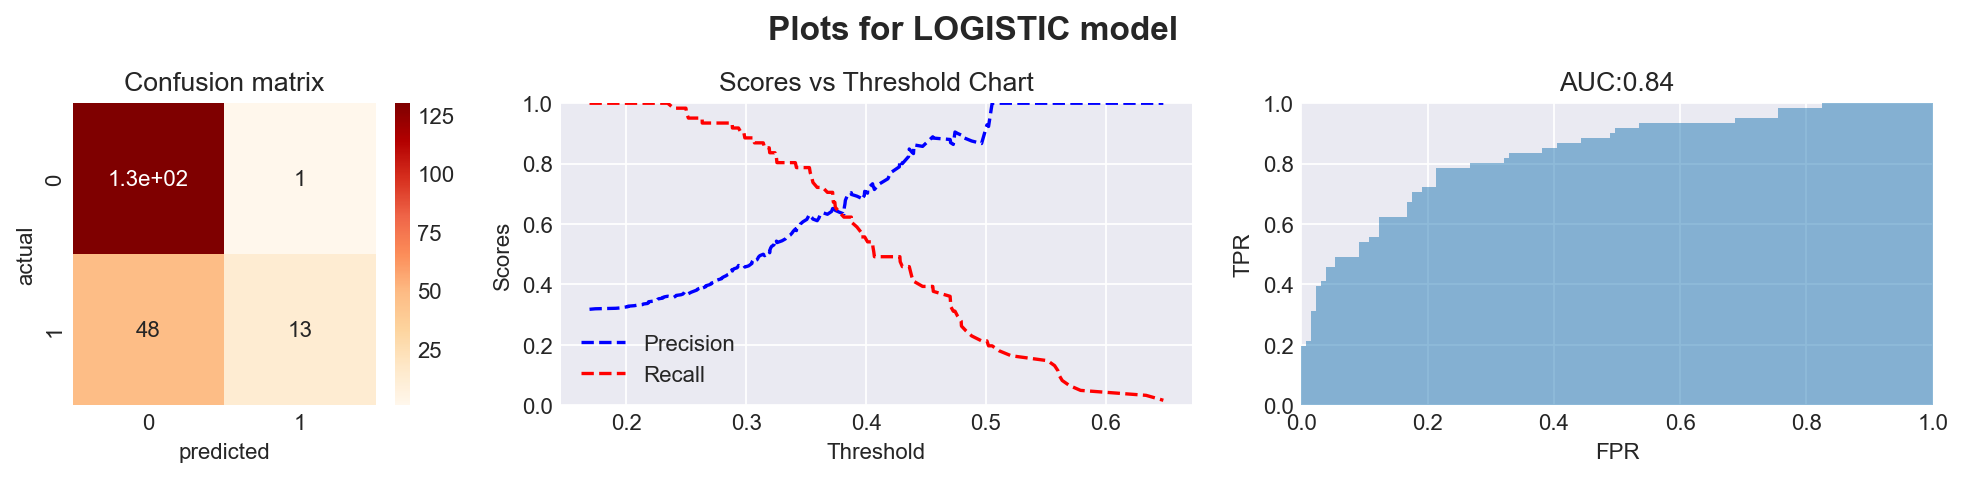

__________________________________________________________________________
DECISION TREE model:

train accuracy: 0.80
test accuracy: 0.72
cross validation f1 score: 0.60

classification report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.80       131
           1       0.57      0.52      0.55        61

    accuracy                           0.72       192
   macro avg       0.68      0.67      0.67       192
weighted avg       0.72      0.72      0.72       192



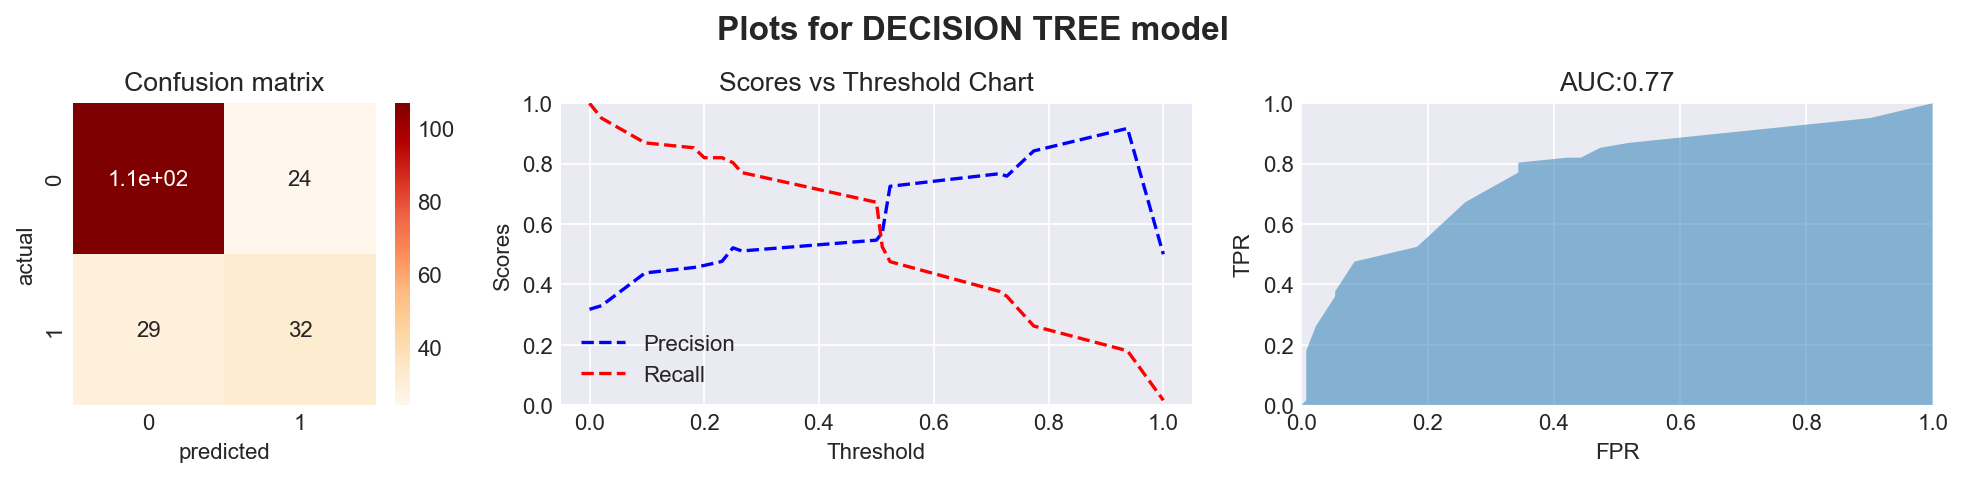

__________________________________________________________________________
RANDOM FOREST model:

train accuracy: 0.81
test accuracy: 0.80
cross validation f1 score: 0.64

classification report:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86       131
           1       0.76      0.52      0.62        61

    accuracy                           0.80       192
   macro avg       0.78      0.72      0.74       192
weighted avg       0.79      0.80      0.79       192



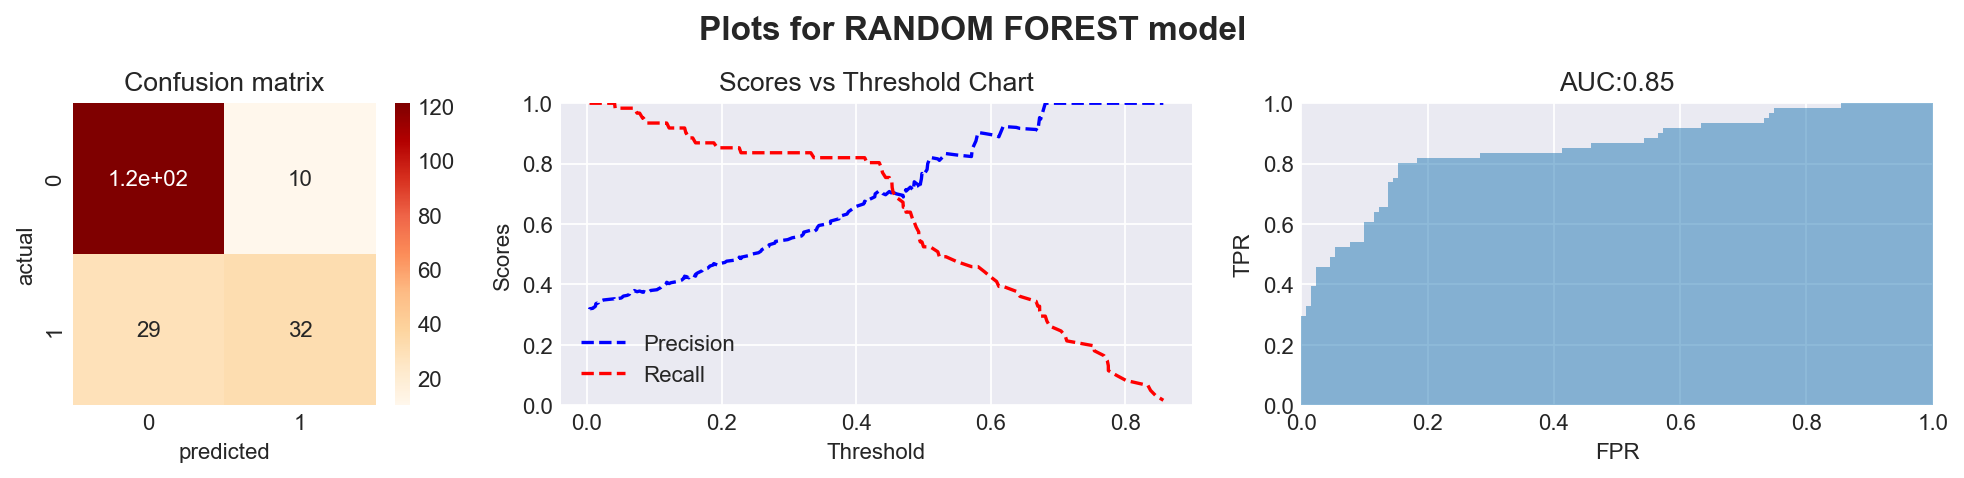

__________________________________________________________________________
ADABOOST USING DT model:

train accuracy: 0.60
test accuracy: 0.66
cross validation f1 score: 0.16

classification report:
               precision    recall  f1-score   support

           0       0.71      0.84      0.77       131
           1       0.43      0.26      0.33        61

    accuracy                           0.66       192
   macro avg       0.57      0.55      0.55       192
weighted avg       0.62      0.66      0.63       192



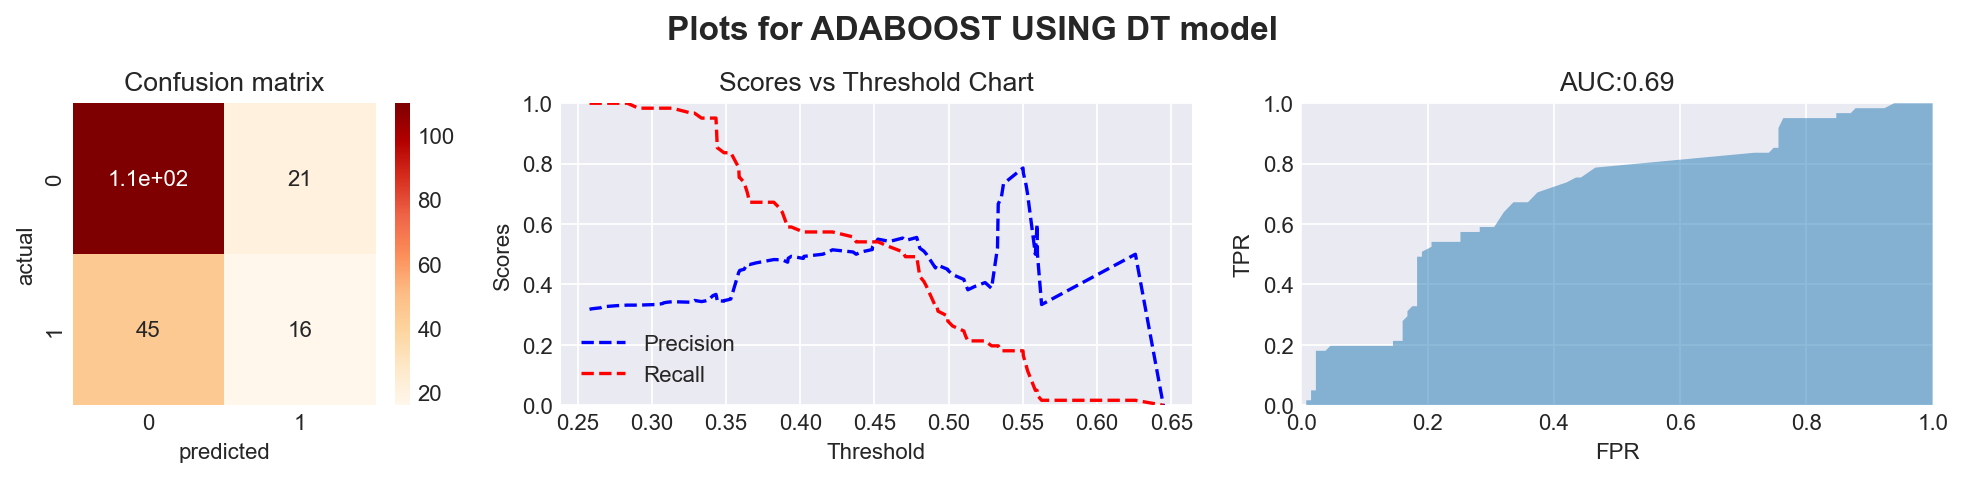

__________________________________________________________________________
ADABOOST USING RF model:

train accuracy: 0.90
test accuracy: 0.80
cross validation f1 score: 0.65

classification report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       131
           1       0.69      0.66      0.67        61

    accuracy                           0.80       192
   macro avg       0.77      0.76      0.76       192
weighted avg       0.79      0.80      0.80       192



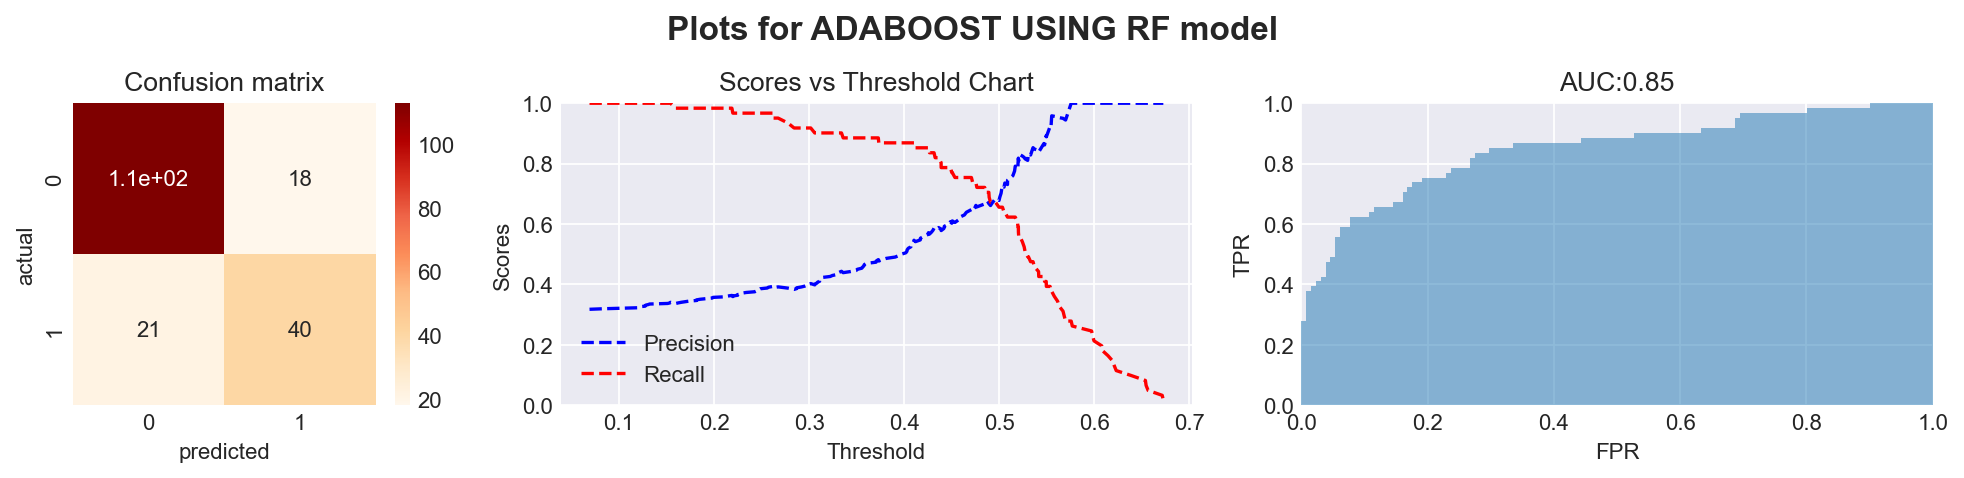

__________________________________________________________________________
GRADBOOST model:

train accuracy: 1.00
test accuracy: 0.77
cross validation f1 score: 0.62

classification report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       131
           1       0.64      0.64      0.64        61

    accuracy                           0.77       192
   macro avg       0.74      0.74      0.74       192
weighted avg       0.77      0.77      0.77       192



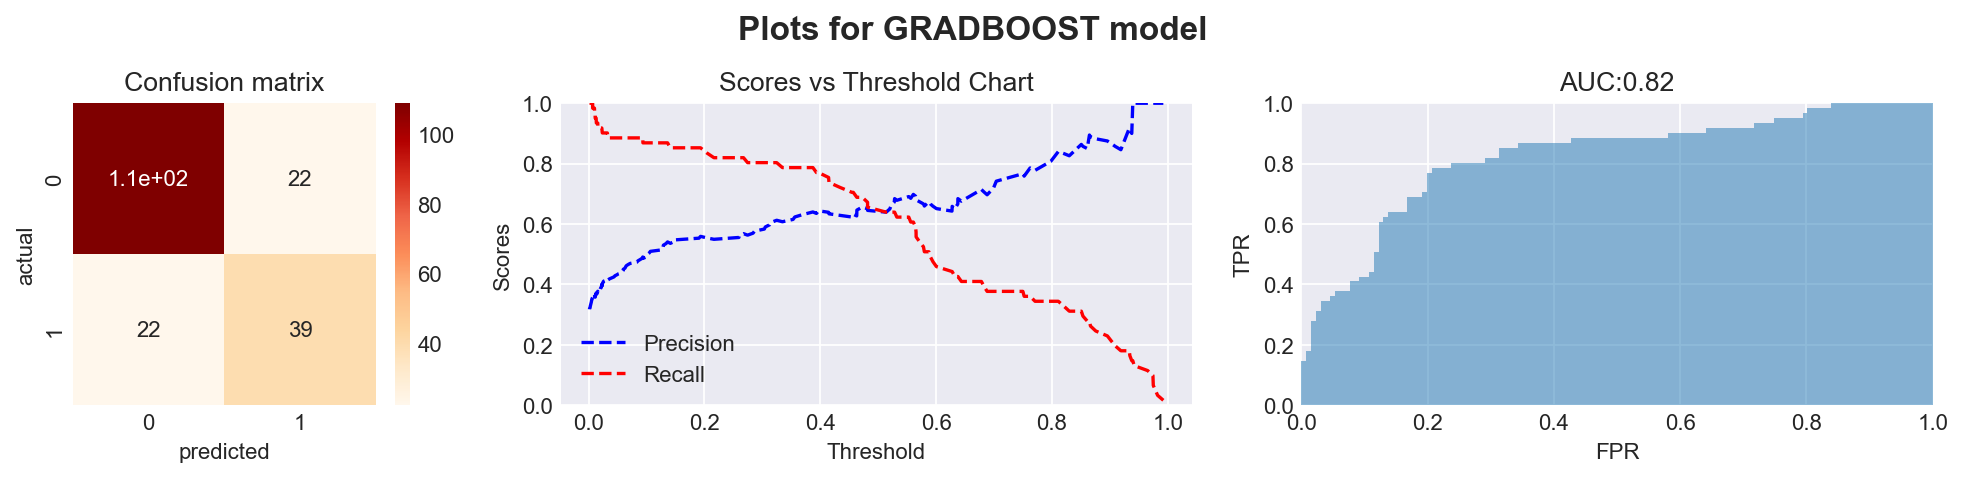

__________________________________________________________________________
SVC model:

train accuracy: 0.78
test accuracy: 0.80
cross validation f1 score: 0.59

classification report:
               precision    recall  f1-score   support

           0       0.80      0.95      0.87       131
           1       0.83      0.48      0.60        61

    accuracy                           0.80       192
   macro avg       0.81      0.71      0.74       192
weighted avg       0.81      0.80      0.78       192



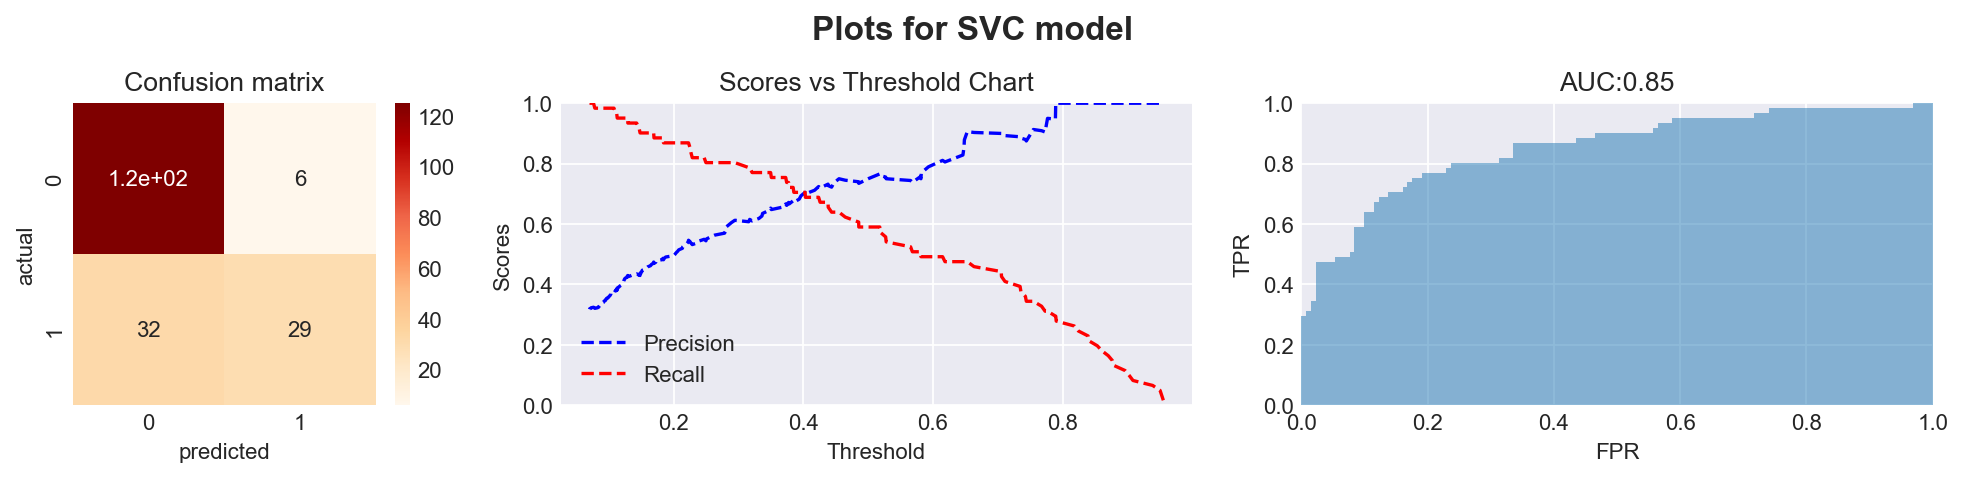

__________________________________________________________________________
GAUSSIAN NB model:

train accuracy: 0.74
test accuracy: 0.79
cross validation f1 score: 0.64

classification report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       131
           1       0.70      0.57      0.63        61

    accuracy                           0.79       192
   macro avg       0.76      0.73      0.74       192
weighted avg       0.78      0.79      0.78       192



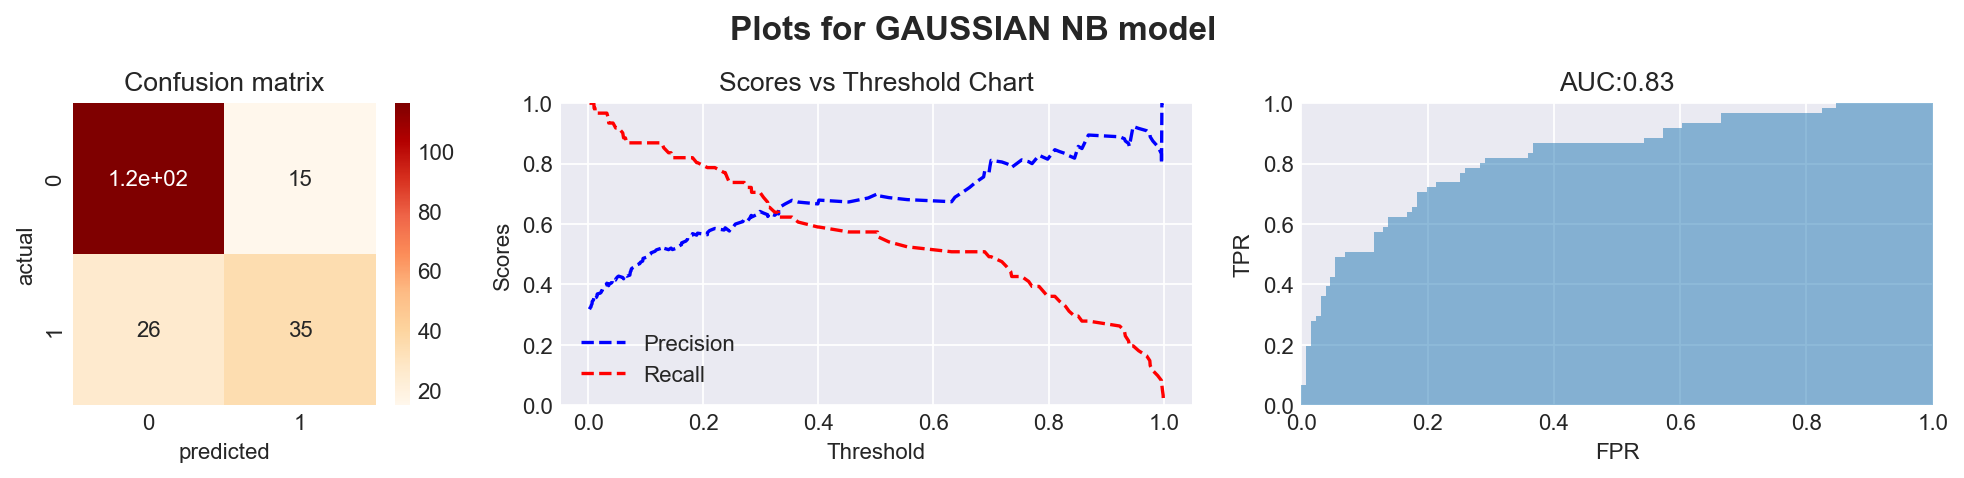

__________________________________________________________________________
KNC model:

train accuracy: 1.00
test accuracy: 0.71
cross validation f1 score: 0.56

classification report:
               precision    recall  f1-score   support

           0       0.77      0.81      0.79       131
           1       0.55      0.49      0.52        61

    accuracy                           0.71       192
   macro avg       0.66      0.65      0.65       192
weighted avg       0.70      0.71      0.70       192



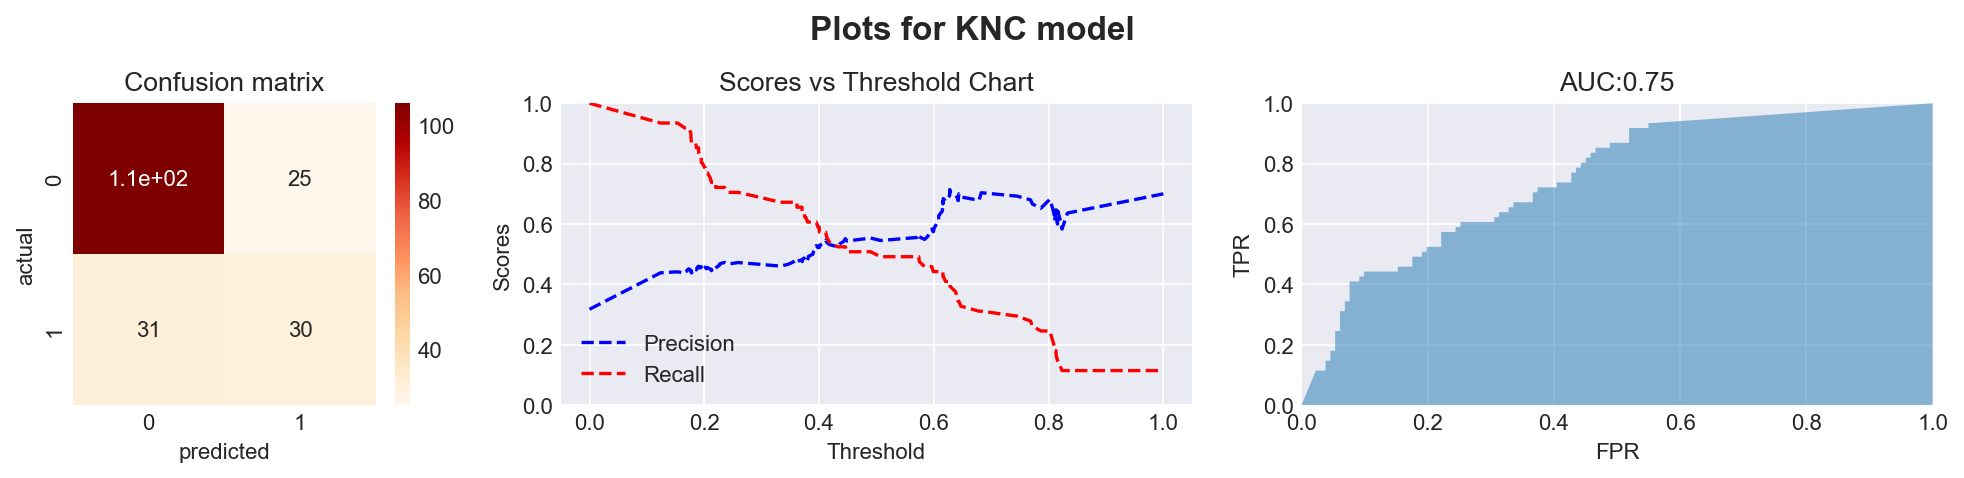

__________________________________________________________________________
RNC model:

train accuracy: 1.00
test accuracy: 0.68
cross validation f1 score: 0.00

classification report:
               precision    recall  f1-score   support

           0       0.68      1.00      0.81       131
           1       0.00      0.00      0.00        61

    accuracy                           0.68       192
   macro avg       0.34      0.50      0.41       192
weighted avg       0.47      0.68      0.55       192



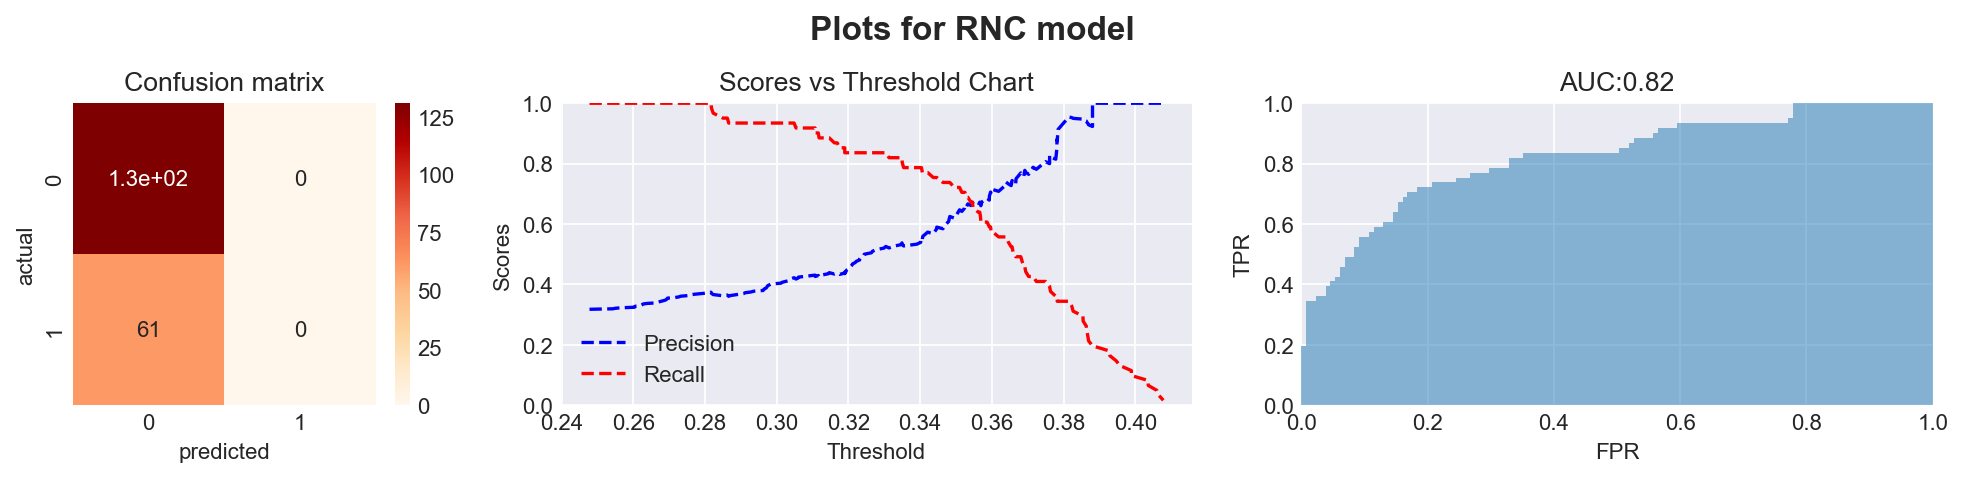

__________________________________________________________________________
XGBOOST model:

train accuracy: 1.00
test accuracy: 0.76
cross validation f1 score: 0.61

classification report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       131
           1       0.61      0.64      0.62        61

    accuracy                           0.76       192
   macro avg       0.72      0.72      0.72       192
weighted avg       0.76      0.76      0.76       192



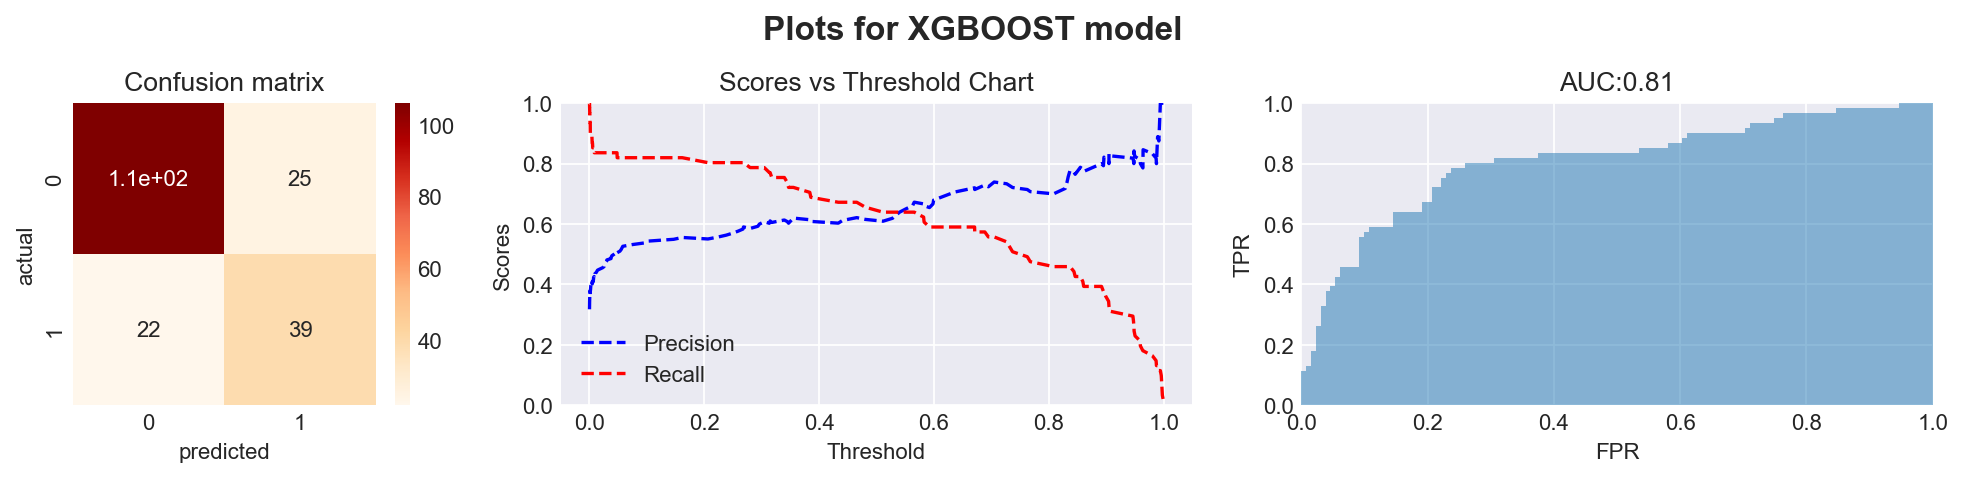

__________________________________________________________________________


In [21]:
# dataframe to store metrics like AUC, f1 score
df_metrics=pd.DataFrame(columns=['f1_score','AUC'] )

for name,model in models.items():
    
    # making pipeline for each model
    pipeline = Pipeline(steps=[( "preprocessor", MinMaxScaler() ),
                               ( "classifier", model )
                              ]
                       )
    
    # print name of pipeline
    print(name.upper(), 'model:\n')
    
    # fitting data
    pipeline.fit(xtrain,ytrain)
    
    # calculating scores and storing
    f1_score_cv=np.mean( cross_val_score(pipeline, X, y, cv=5, scoring='f1', n_jobs=-1) )
    df_metrics.loc[name,'f1_score']=f1_score_cv
    
    # printing scores
    print(f'train accuracy: { pipeline.score(xtrain,ytrain) :.2f}' )
    print(f'test accuracy: { pipeline.score(xtest,ytest) :.2f}' )
    print(f'cross validation f1 score: { f1_score_cv :.2f}' )
    print('\nclassification report:\n', classification_report(ytest,pipeline.predict(xtest)) )

    
                    ############### CALCULATIONS ##################
        
    '''scores vs threshold'''
    from sklearn.metrics import precision_recall_curve, auc, roc_curve, roc_auc_score
    
    # probs_y is a 2-D array of probability of being labeled as 0 (first column of  array) vs 1 (2nd column in array)
    y_probs=pipeline.predict_proba(xtest) 

    precision, recall, thresholds = precision_recall_curve(ytest, y_probs[:,1]) 

    #retrieve probability of being 1(in second column of probs_y)
    pr_auc = auc(recall, precision)
    
    '''AUC ROC'''
    y_pred_proba = pipeline.predict_proba(xtest)[::,1]
    fpr, tpr, _ = roc_curve(ytest,  y_pred_proba)
    auc = roc_auc_score(ytest, y_pred_proba)
    #storing AUC in dataframe
    df_metrics.loc[name,'AUC']=auc
    
                    ################ PLOTTING ##################
        
    fig, (ax1, ax2, ax3)=plt.subplots(1,3, figsize=(15,2.5), dpi=160, gridspec_kw={'width_ratios': [6, 10, 10]} )  
    
    # confusion matrix
    sns.heatmap( confusion_matrix(ytest,pipeline.predict(xtest)), annot=True, cmap='OrRd', ax=ax1 )
    ax1.set_xlabel('predicted')
    ax1.set_ylabel('actual')
    ax1.set_title('Confusion matrix')
    
    # scores vs threshold
    ax2.plot(thresholds, precision[: -1], "b--", label="Precision")
    ax2.plot(thresholds, recall[: -1], "r--", label="Recall")
    ax2.set_ylabel("Scores")
    ax2.set_xlabel("Threshold")
    ax2.set_title("Scores vs Threshold Chart")
    ax2.legend(loc="lower left")
    ax2.set_ylim([0,1])
    
    # AUC ROC
    ax3.stackplot(fpr, tpr, alpha=0.5)
    ax3.set_title(f'AUC:{ auc :.2f}')
    ax3.set_xlabel('FPR')
    ax3.set_ylabel('TPR')
    ax3.set_xlim(0,1)
    ax3.set_ylim(0,1)
    
    plt.suptitle(f'Plots for {name.upper()} model', fontsize=15, y=1.1, fontweight='bold')
    plt.show()
    
    print('__________________________________________________________________________')
    

### Metrics dataframe

In [22]:
df_metrics

,f1_score,AUC
logistic,0.368792,0.837317
decision tree,0.60089,0.771555
random forest,0.636889,0.84908
adaboost using dt,0.162746,0.689526
adaboost using rf,0.652095,0.848079
gradboost,0.619906,0.821925
SVC,0.588588,0.851208
Gaussian NB,0.63584,0.825929
KNC,0.564705,0.754036
RNC,0.0,0.824052


# **Comparing metrics**

### F1 scores comparison

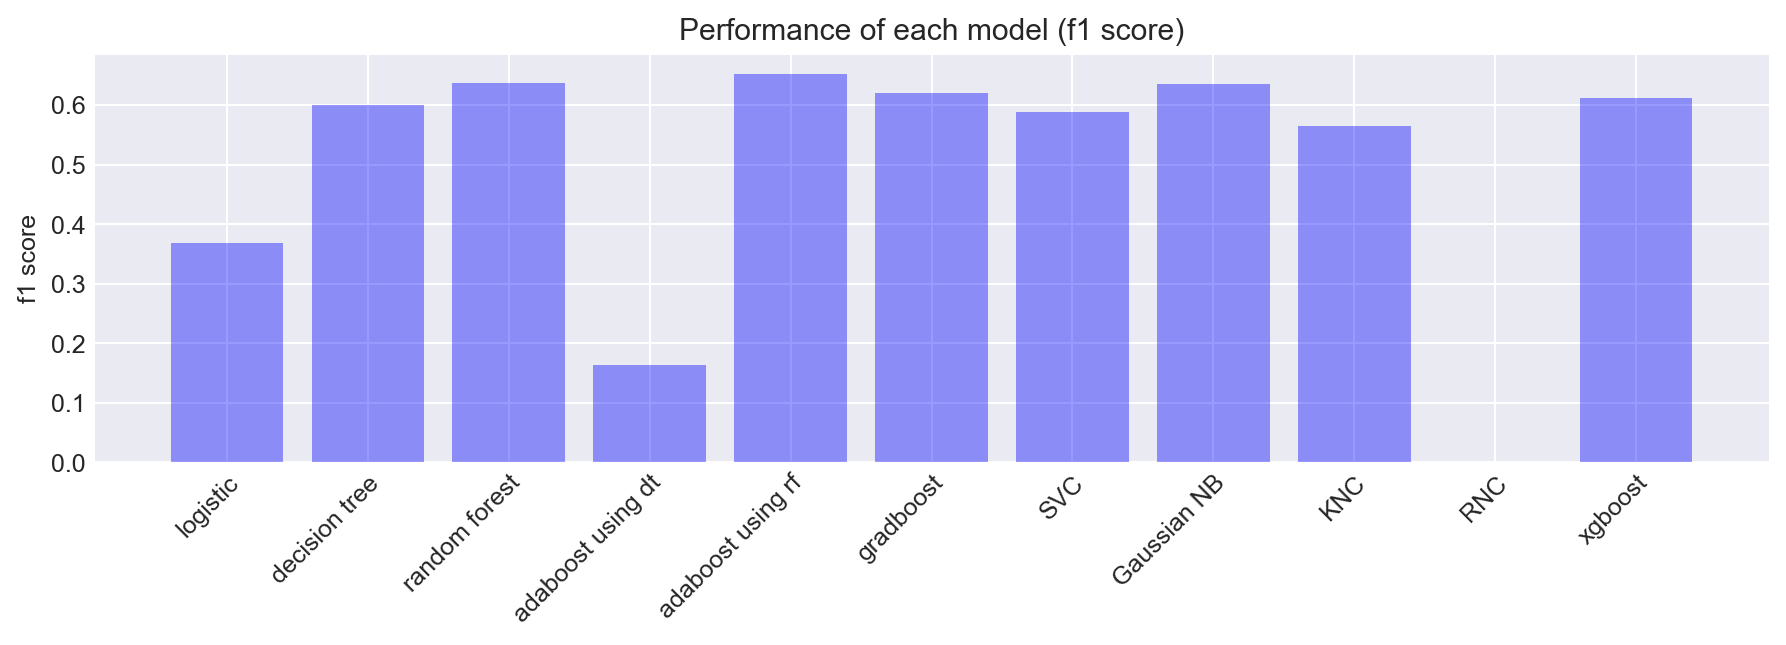

In [27]:
plt.figure(figsize=(12,3), dpi=180)
plt.bar( df_metrics.index, df_metrics.f1_score, color='blue', alpha=0.4)
plt.ylabel('f1 score')
plt.title('Performance of each model (f1 score)')
plt.xticks(rotation=45, rotation_mode="anchor", ha="right")
plt.show()

### AUC comparison

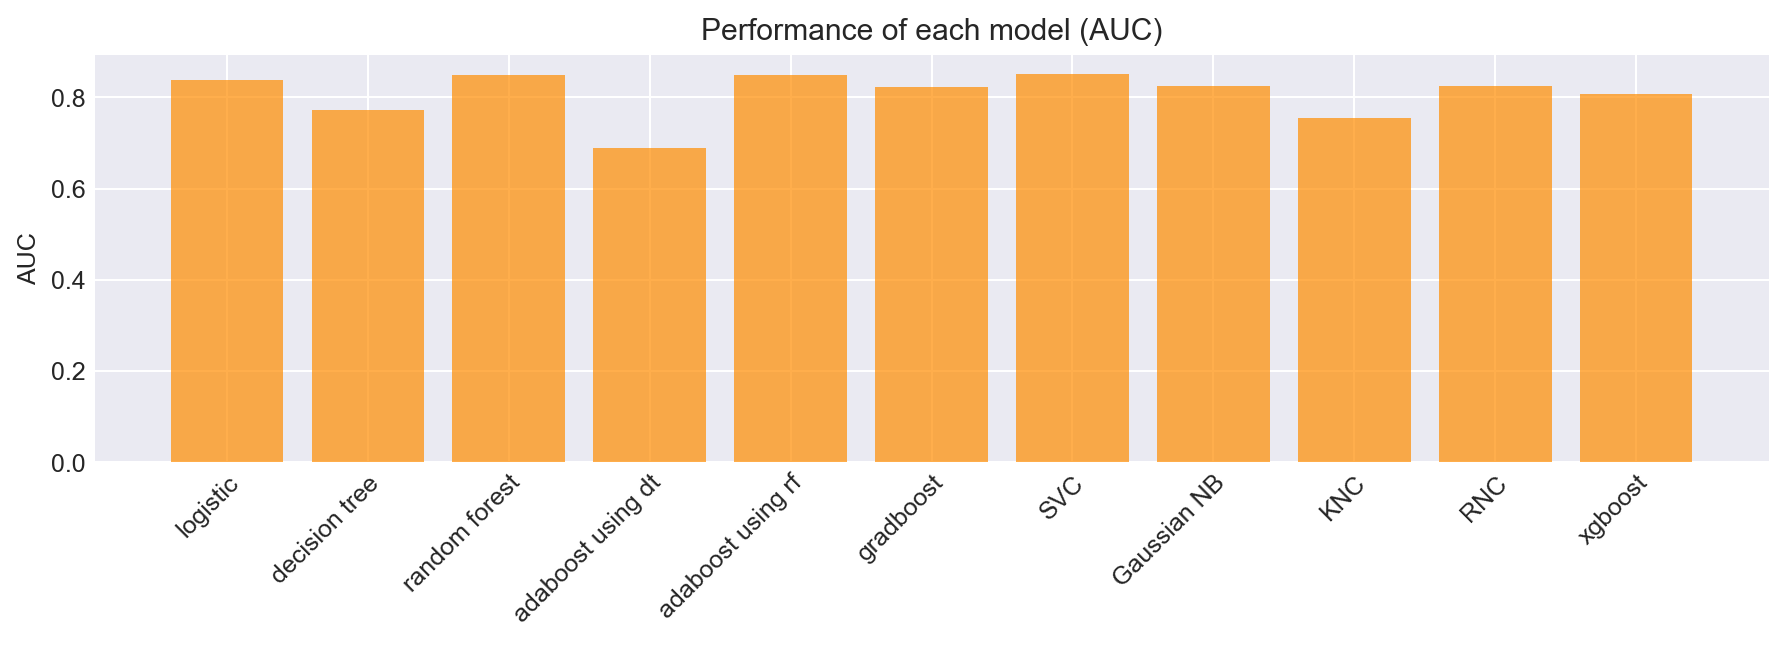

In [24]:
plt.figure(figsize=(12,3), dpi=180)
plt.bar( df_metrics.index, df_metrics.AUC, color='darkorange', alpha=0.7)
plt.ylabel('AUC')
plt.title('Performance of each model (AUC)')
plt.xticks(rotation=45, rotation_mode="anchor", ha="right")
plt.show()


    most of the models seem to be predicting no diabetes easily
    whereas they are unable to predict diabetes happening
### ***This is mostly due to imbalanced classes and the lower occuring class needs to be balanced***